In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 500)

In [2]:
train_df = pd.read_csv("Resources/sales_train_evaluation.csv")
calendar_df = pd.read_csv("Resources/calendar.csv")
sell_prices_df = pd.read_csv("Resources/sell_prices.csv")

# Separating States In Train Data Set

In [3]:
ca_sales_df = train_df[train_df['state_id']=='CA'].copy()
print(f'Data frame for California has {ca_sales_df.isna().sum().sum()} NA values')
tx_sales_df = train_df[train_df['state_id']=='TX'].copy()
print(f'Data frame for Texas has {tx_sales_df.isna().sum().sum()} NA values')
wi_sales_df = train_df[train_df['state_id']=='WI'].copy()
print(f'Data frame for Wisconsin has {wi_sales_df.isna().sum().sum()} NA values')

Data frame for California has 0 NA values
Data frame for Texas has 0 NA values
Data frame for Wisconsin has 0 NA values


In [4]:
display(ca_sales_df.head())
display(tx_sales_df.head())
display(wi_sales_df.head())

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,d_244,...,d_1692,d_1693,d_1694,d_1695,d_1696,d_1697,d_1698,d_1699,d_1700,d_1701,d_1702,d_1703,d_1704,d_1705,d_1706,d_1707,d_1708,d_1709,d_1710,d_1711,d_1712,d_1713,d_1714,d_1715,d_1716,d_1717,d_1718,d_1719,d_1720,d_1721,d_1722,d_1723,d_1724,d_1725,d_1726,d_1727,d_1728,d_1729,d_1730,d_1731,d_1732,d_1733,d_1734,d_1735,d_1736,d_1737,d_1738,d_1739,d_1740,d_1741,d_1742,d_1743,d_1744,d_1745,d_1746,d_1747,d_1748,d_1749,d_1750,d_1751,d_1752,d_1753,d_1754,d_1755,d_1756,d_1757,d_1758,d_1759,d_1760,d_1761,d_1762,d_1763,d_1764,d_1765,d_1766,d_1767,d_1768,d_1769,d_1770,d_1771,d_1772,d_1773,d_1774,d_1775,d_1776,d_1777,d_1778,d_1779,d_1780,d_1781,d_1782,d_1783,d_1784,d_1785,d_1786,d_1787,d_1788,d_1789,d_1790,d_1791,d_1792,d_1793,d_1794,d_1795,d_1796,d_1797,d_1798,d_1799,d_1800,d_1801,d_1802,d_1803,d_1804,d_1805,d_1806,d_1807,d_1808,d_1809,d_1810,d_1811,d_1812,d_1813,d_1814,d_1815,d_1816,d_1817,d_1818,d_1819,d_1820,d_1821,d_1822,d_1823,d_1824,d_1825,d_1826,d_1827,d_1828,d_1829,d_1830,d_1831,d_1832,d_1833,d_1834,d_1835,d_1836,d_1837,d_1838,d_1839,d_1840,d_1841,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,d_1850,d_1851,d_1852,d_1853,d_1854,d_1855,d_1856,d_1857,d_1858,d_1859,d_1860,d_1861,d_1862,d_1863,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,1,0,1,0,1,0,3,1,1,0,1,1,2,0,0,0,0,1,1,0,0,0,0,3,0,1,0,0,0,0,1,1,1,0,1,0,2,0,0,0,0,2,0,0,0,0,1,1,2,0,0,0,0,2,0,0,1,1,1,1,0,0,0,0,0,1,2,2,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,3,0,1,2,1,0,3,0,0,0,1,0,2,2,1,0,0,1,2,0,1,0,1,4,0,0,5,0,0,0,0,0,0,2,1,2,1,0,0,0,1,1,1,0,0,1,1,1,1

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,d_244,...,d_1692,d_1693,d_1694,d_1695,d_1696,d_1697,d_1698,d_1699,d_1700,d_1701,d_1702,d_1703,d_1704,d_1705,d_1706,d_1707,d_1708,d_1709,d_1710,d_1711,d_1712,d_1713,d_1714,d_1715,d_1716,d_1717,d_1718,d_1719,d_1720,d_1721,d_1722,d_1723,d_1724,d_1725,d_1726,d_1727,d_1728,d_1729,d_1730,d_1731,d_1732,d_1733,d_1734,d_1735,d_1736,d_1737,d_1738,d_1739,d_1740,d_1741,d_1742,d_1743,d_1744,d_1745,d_1746,d_1747,d_1748,d_1749,d_1750,d_1751,d_1752,d_1753,d_1754,d_1755,d_1756,d_1757,d_1758,d_1759,d_1760,d_1761,d_1762,d_1763,d_1764,d_1765,d_1766,d_1767,d_1768,d_1769,d_1770,d_1771,d_1772,d_1773,d_1774,d_1775,d_1776,d_1777,d_1778,d_1779,d_1780,d_1781,d_1782,d_1783,d_1784,d_1785,d_1786,d_1787,d_1788,d_1789,d_1790,d_1791,d_1792,d_1793,d_1794,d_1795,d_1796,d_1797,d_1798,d_1799,d_1800,d_1801,d_1802,d_1803,d_1804,d_1805,d_1806,d_1807,d_1808,d_1809,d_1810,d_1811,d_1812,d_1813,d_1814,d_1815,d_1816,d_1817,d_1818,d_1819,d_1820,d_1821,d_1822,d_1823,d_1824,d_1825,d_1826,d_1827,d_1828,d_1829,d_1830,d_1831,d_1832,d_1833,d_1834,d_1835,d_1836,d_1837,d_1838,d_1839,d_1840,d_1841,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,d_1850,d_1851,d_1852,d_1853,d_1854,d_1855,d_1856,d_1857,d_1858,d_1859,d_1860,d_1861,d_1862,d_1863,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
12196,HOBBIES_1_001_TX_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_1,TX,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,1,0

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,d_244,...,d_1692,d_1693,d_1694,d_1695,d_1696,d_1697,d_1698,d_1699,d_1700,d_1701,d_1702,d_1703,d_1704,d_1705,d_1706,d_1707,d_1708,d_1709,d_1710,d_1711,d_1712,d_1713,d_1714,d_1715,d_1716,d_1717,d_1718,d_1719,d_1720,d_1721,d_1722,d_1723,d_1724,d_1725,d_1726,d_1727,d_1728,d_1729,d_1730,d_1731,d_1732,d_1733,d_1734,d_1735,d_1736,d_1737,d_1738,d_1739,d_1740,d_1741,d_1742,d_1743,d_1744,d_1745,d_1746,d_1747,d_1748,d_1749,d_1750,d_1751,d_1752,d_1753,d_1754,d_1755,d_1756,d_1757,d_1758,d_1759,d_1760,d_1761,d_1762,d_1763,d_1764,d_1765,d_1766,d_1767,d_1768,d_1769,d_1770,d_1771,d_1772,d_1773,d_1774,d_1775,d_1776,d_1777,d_1778,d_1779,d_1780,d_1781,d_1782,d_1783,d_1784,d_1785,d_1786,d_1787,d_1788,d_1789,d_1790,d_1791,d_1792,d_1793,d_1794,d_1795,d_1796,d_1797,d_1798,d_1799,d_1800,d_1801,d_1802,d_1803,d_1804,d_1805,d_1806,d_1807,d_1808,d_1809,d_1810,d_1811,d_1812,d_1813,d_1814,d_1815,d_1816,d_1817,d_1818,d_1819,d_1820,d_1821,d_1822,d_1823,d_1824,d_1825,d_1826,d_1827,d_1828,d_1829,d_1830,d_1831,d_1832,d_1833,d_1834,d_1835,d_1836,d_1837,d_1838,d_1839,d_1840,d_1841,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,d_1850,d_1851,d_1852,d_1853,d_1854,d_1855,d_1856,d_1857,d_1858,d_1859,d_1860,d_1861,d_1862,d_1863,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
21343,HOBBIES_1_001_WI_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_1,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,2,1,2,0,0,1,0,0,2,1,0,0,0,0,1,0,2,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1,2,0,2,3,0,0,0,3,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2,2,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,2,0,1,0,1,0,0,1,0,0,2,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1

# Separating States in Sell Prices Data Set

In [5]:
ca_sell_prices = sell_prices_df[sell_prices_df["store_id"].isin(["CA_1","CA_2","CA_3","CA_4"])]
print(f'Sell Pricess for California has shape {ca_sell_prices.shape} and {ca_sell_prices.isna().sum().sum()} NA values')
tx_sell_prices = sell_prices_df[sell_prices_df['store_id'].isin(['TX_1', 'TX_2', 'TX_3'])]
print(f'Sell Pricess for Texas has has shape {tx_sell_prices.shape} and {tx_sell_prices.isna().sum().sum()} NA values')
wi_sell_prices = sell_prices_df[sell_prices_df['store_id'].isin(['WI_1','WI_2', 'WI_3'])]
print(f'Sell Pricess for Wisconsin has has shape {wi_sell_prices.shape} and {wi_sell_prices.isna().sum().sum()} NA values')

Sell Pricess for California has shape (2708822, 4) and 0 NA values
Sell Pricess for Texas has has shape (2092122, 4) and 0 NA values
Sell Pricess for Wisconsin has has shape (2040177, 4) and 0 NA values


In [6]:
display(ca_sell_prices.head())
display(tx_sell_prices.head())
display(wi_sell_prices.head())

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


,store_id,item_id,wm_yr_wk,sell_price
2708822,TX_1,HOBBIES_1_001,11325,9.58
2708823,TX_1,HOBBIES_1_001,11326,8.26
2708824,TX_1,HOBBIES_1_001,11327,8.26
2708825,TX_1,HOBBIES_1_001,11328,8.26
2708826,TX_1,HOBBIES_1_001,11329,8.26


,store_id,item_id,wm_yr_wk,sell_price
4800944,WI_1,HOBBIES_1_001,11325,9.58
4800945,WI_1,HOBBIES_1_001,11326,9.58
4800946,WI_1,HOBBIES_1_001,11327,9.58
4800947,WI_1,HOBBIES_1_001,11328,9.58
4800948,WI_1,HOBBIES_1_001,11329,9.58


# Melting Sales Data Frame to join with other Data Frames

In [7]:
# Melting California DataFrame
ca_sales_df_melted = ca_sales_df.melt(id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])
ca_sales_df_melted.rename({"variable":"Day","value":"Quantity"},axis=1,inplace=True)

# Melting Texas DataFrame
tx_sales_df_melted = tx_sales_df.melt(id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])
tx_sales_df_melted.rename({"variable":"Day","value":"Quantity"},axis=1,inplace=True)

# Melting Wisconsin DataFrame
wi_sales_df_melted = wi_sales_df.melt(id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])
wi_sales_df_melted.rename({"variable":"Day","value":"Quantity"},axis=1,inplace=True)

In [8]:
display(ca_sales_df_melted.head())
display(tx_sales_df_melted.head())
display(wi_sales_df_melted.head())

,id,item_id,dept_id,cat_id,store_id,state_id,Day,Quantity
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0


,id,item_id,dept_id,cat_id,store_id,state_id,Day,Quantity
0,HOBBIES_1_001_TX_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_1,TX,d_1,0
1,HOBBIES_1_002_TX_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,TX_1,TX,d_1,0
2,HOBBIES_1_003_TX_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,TX_1,TX,d_1,0
3,HOBBIES_1_004_TX_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,TX_1,TX,d_1,1
4,HOBBIES_1_005_TX_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,TX_1,TX,d_1,0


,id,item_id,dept_id,cat_id,store_id,state_id,Day,Quantity
0,HOBBIES_1_001_WI_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0
1,HOBBIES_1_002_WI_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0
2,HOBBIES_1_003_WI_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0
3,HOBBIES_1_004_WI_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,WI_1,WI,d_1,2
4,HOBBIES_1_005_WI_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0


# Joining All Three Data Frames

In [9]:
calendar_df.head(10)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,NaN,NaN,1,1,1
6,2011-02-04,11101,Friday,7,2,2011,d_7,NaN,NaN,NaN,NaN,1,0,0
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,NaN,NaN,1,1,1
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,NaN,NaN,1,1,1
9,2011-02-07,11102,Monday,3,2,2011,d_10,NaN,NaN,NaN,NaN,1,1,0


In [10]:
# Join for California
ca_joined_df = pd.merge(left=ca_sales_df_melted, right=calendar_df, how='left', left_on='Day', right_on='d')
ca_joined_df = pd.merge(left=ca_joined_df, right=sell_prices_df, how='left', on=["store_id","item_id","wm_yr_wk"])
ca_joined_df.drop(["snap_TX","snap_WI"],axis=1,inplace=True)
ca_joined_df['total_sales'] = ca_joined_df['Quantity'] * ca_joined_df['sell_price']

# Join for Texas
tx_joined_df = pd.merge(left=tx_sales_df_melted, right=calendar_df, how='left', left_on='Day', right_on='d')
tx_joined_df = pd.merge(left=tx_joined_df, right=sell_prices_df, how='left', on=["store_id","item_id","wm_yr_wk"])
tx_joined_df.drop(["snap_CA","snap_WI"],axis=1,inplace=True)
tx_joined_df['total_sales'] = tx_joined_df['Quantity'] * tx_joined_df['sell_price']

# Join for Wisconsin
wi_joined_df = pd.merge(left=wi_sales_df_melted, right=calendar_df, how='left', left_on='Day', right_on='d')
wi_joined_df = pd.merge(left=wi_joined_df, right=sell_prices_df, how='left', on=["store_id","item_id","wm_yr_wk"])
wi_joined_df.drop(["snap_CA","snap_TX"],axis=1,inplace=True)
wi_joined_df['total_sales'] = wi_joined_df['Quantity'] * wi_joined_df['sell_price']

In [11]:
display(ca_joined_df.head())
display(tx_joined_df.head())
display(wi_joined_df.head())

,id,item_id,dept_id,cat_id,store_id,state_id,Day,Quantity,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,sell_price,total_sales
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,NaN,NaN
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,NaN,NaN
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,NaN,NaN
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,NaN,NaN
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,NaN,NaN


,id,item_id,dept_id,cat_id,store_id,state_id,Day,Quantity,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX,sell_price,total_sales
0,HOBBIES_1_001_TX_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_1,TX,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,NaN,NaN
1,HOBBIES_1_002_TX_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,TX_1,TX,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,NaN,NaN
2,HOBBIES_1_003_TX_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,TX_1,TX,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,NaN,NaN
3,HOBBIES_1_004_TX_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,TX_1,TX,d_1,1,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,4.34,4.34
4,HOBBIES_1_005_TX_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,TX_1,TX,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,NaN,NaN


,id,item_id,dept_id,cat_id,store_id,state_id,Day,Quantity,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_WI,sell_price,total_sales
0,HOBBIES_1_001_WI_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,NaN,NaN
1,HOBBIES_1_002_WI_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,NaN,NaN
2,HOBBIES_1_003_WI_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,NaN,NaN
3,HOBBIES_1_004_WI_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,WI_1,WI,d_1,2,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,4.34,8.68
4,HOBBIES_1_005_WI_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,WI_1,WI,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,NaN,NaN


# Daily Total (Daily SUM) Sales Aggregation

In [12]:
# Groupby and picot for California
ca_store_sales_sum = ca_joined_df.groupby(['store_id', 'date'], as_index=False).agg(Total_Sales=('total_sales', 'sum'))
ca_store_sales_sum['date'] = pd.to_datetime(ca_store_sales_sum['date'])
ca_store_sales_sum = ca_store_sales_sum.pivot(index="date",columns="store_id",values="Total_Sales")

# Groupby and picot for Texas
tx_store_sales_sum = tx_joined_df.groupby(['store_id', 'date'], as_index=False).agg(Total_Sales=('total_sales', 'sum'))
tx_store_sales_sum['date'] = pd.to_datetime(tx_store_sales_sum['date'])
tx_store_sales_sum = tx_store_sales_sum.pivot(index="date",columns="store_id",values="Total_Sales")

# Groupby and picot for Wisconsin
wi_store_sales_sum = wi_joined_df.groupby(['store_id', 'date'], as_index=False).agg(Total_Sales=('total_sales', 'sum'))
wi_store_sales_sum['date'] = pd.to_datetime(wi_store_sales_sum['date'])
wi_store_sales_sum = wi_store_sales_sum.pivot(index="date",columns="store_id",values="Total_Sales")

In [13]:
display(ca_store_sales_sum.head())
display(tx_store_sales_sum.head())
display(wi_store_sales_sum.head())

store_id,CA_1,CA_2,CA_3,CA_4
date,,,,
2011-01-29,10933.16,9101.52,11679.83,4561.59
2011-01-30,9787.06,8417.53,12161.46,4681.41
2011-01-31,7201.38,5320.51,9123.86,3637.98
2011-02-01,7407.74,5550.56,10249.78,3708.92
2011-02-02,6566.12,5229.72,9538.65,3841.14


store_id,TX_1,TX_2,TX_3
date,,,
2011-01-29,6586.68,9915.78,7597.99
2011-01-30,6610.60,9804.54,7356.54
2011-01-31,4551.97,6651.16,5406.70
2011-02-01,5374.39,6985.60,5597.97
2011-02-02,4347.07,6039.05,4069.74


store_id,WI_1,WI_2,WI_3
date,,,
2011-01-29,6454.72,5451.46,9367.88
2011-01-30,5645.77,4636.86,9868.80
2011-01-31,3640.12,4621.58,7551.65
2011-02-01,2949.96,5754.75,7181.53
2011-02-02,2.96,2679.19,4646.31


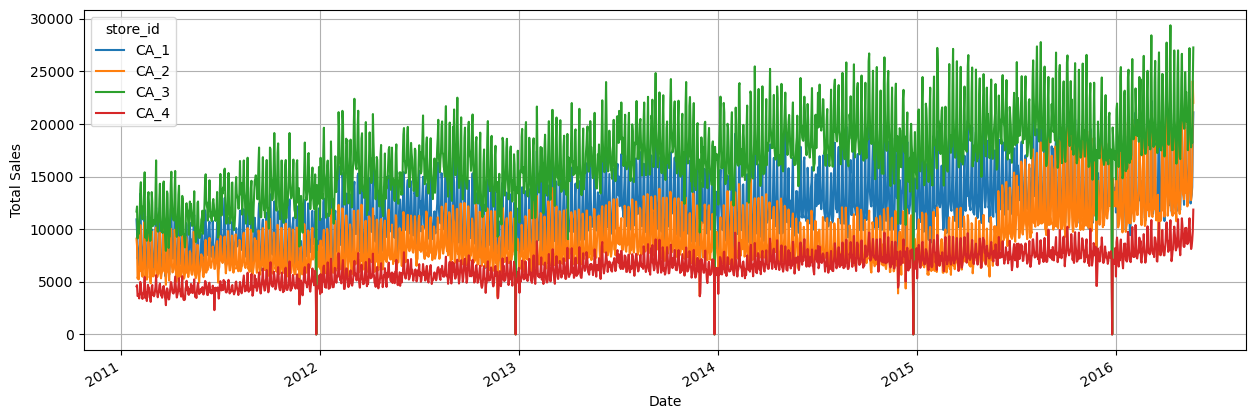

In [15]:
ca_store_sales_sum.plot(legend=True,
                        figsize=(15,5),
                        grid=True,
                        ylabel="Total Sales",
                        xlabel="Date",
                        x_compat=True)
ax = plt.gca()

<Axes: title={'center': '30 days moving window (mean)'}, xlabel='date'>

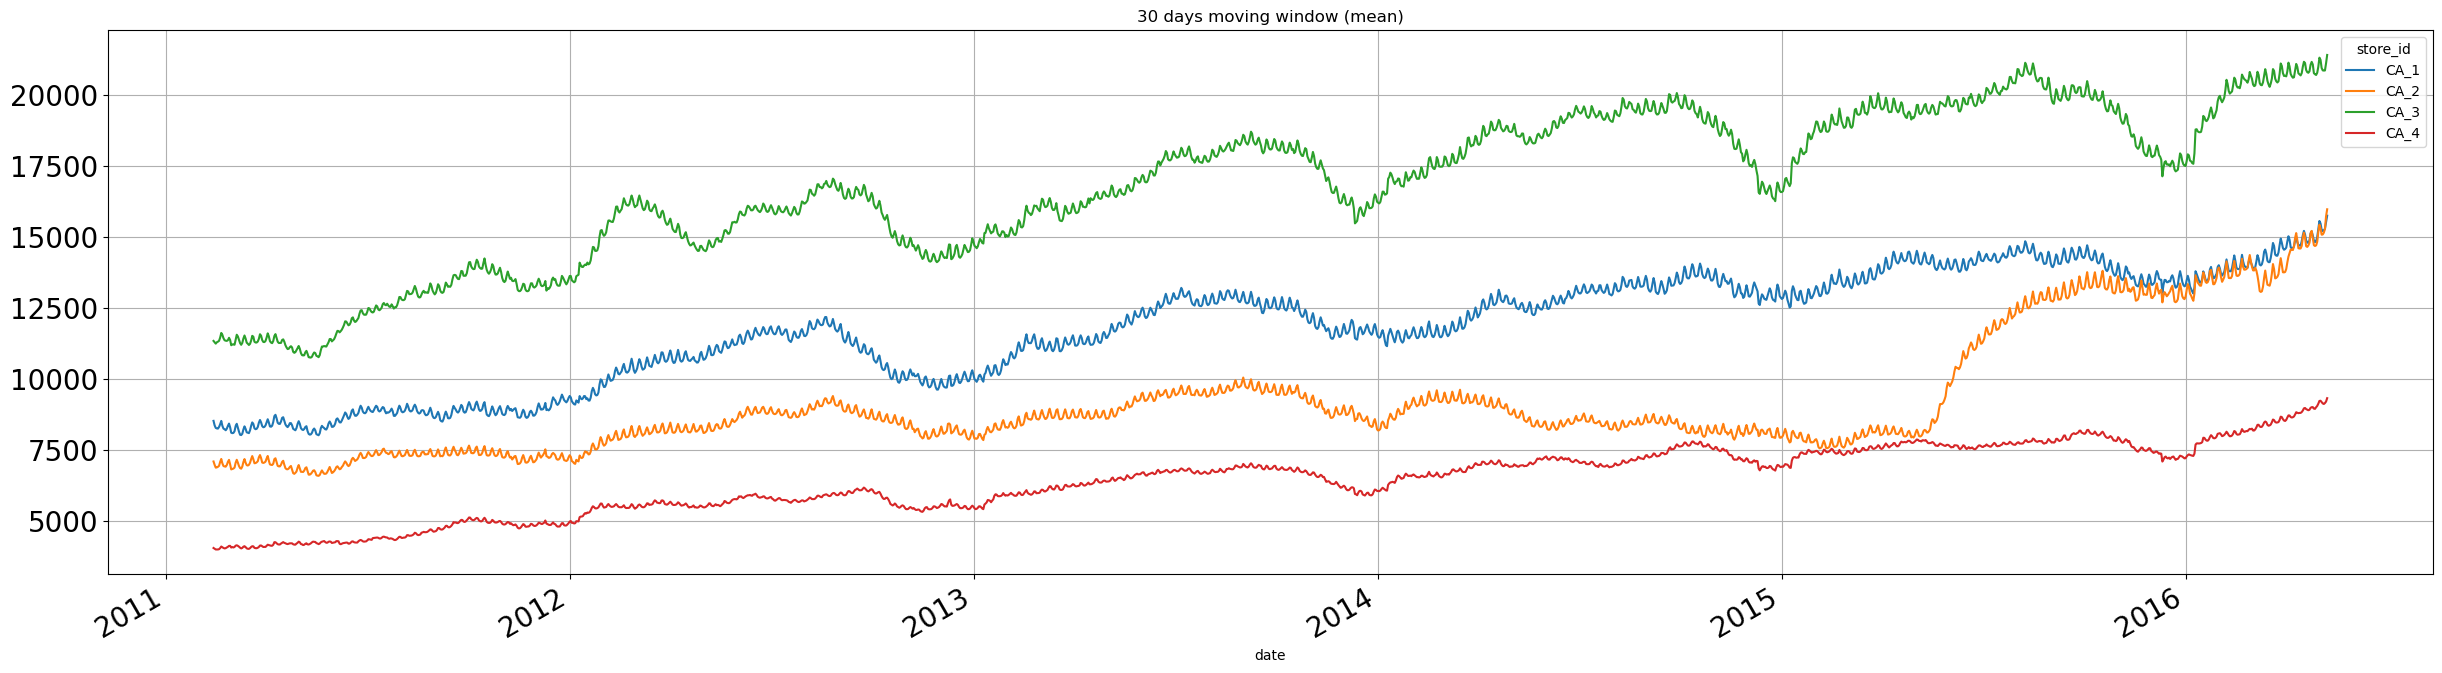

In [15]:
ca_store_sales_sum.rolling(30, center=True).mean().plot(figsize=(15,5), title='30 days moving window (mean)', 
                                                        fontsize=20, grid=True, x_compat=True)

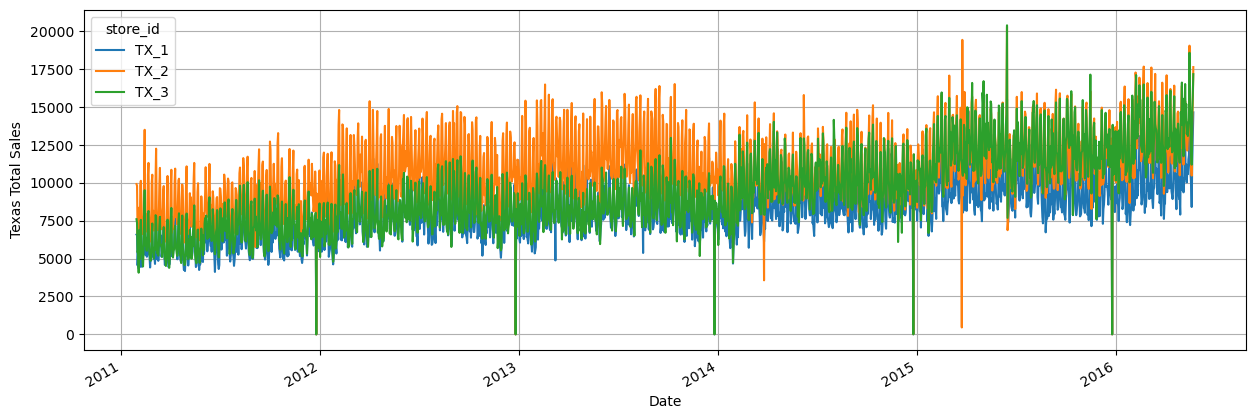

In [16]:
tx_store_sales_sum.plot(legend=True,
                        figsize=(15,5),
                        grid=True,
                        ylabel="Texas Total Sales",
                        xlabel="Date",
                        x_compat=True)
ax = plt.gca()

<Axes: title={'center': '30 days moving window (mean)'}, xlabel='date'>

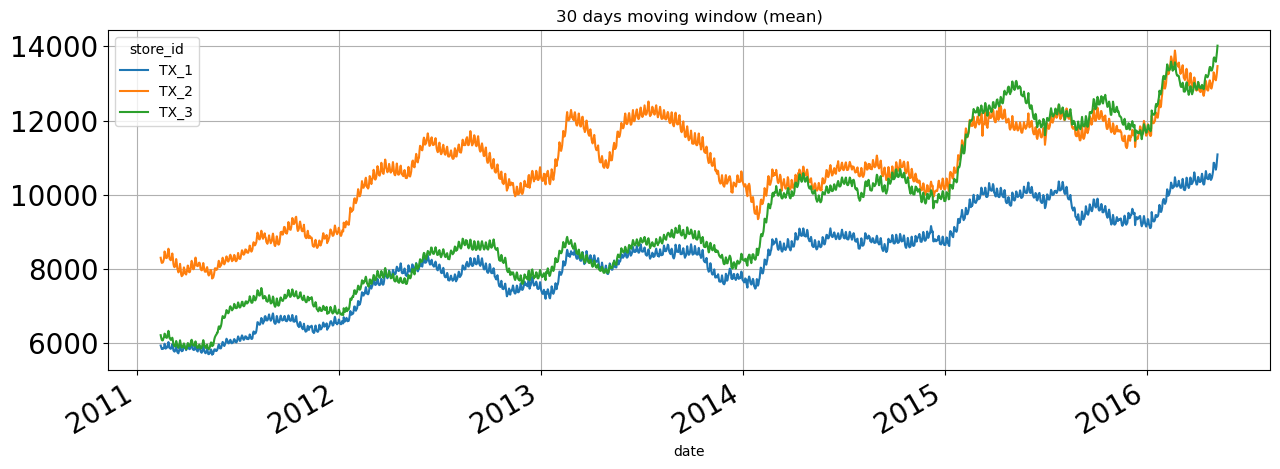

In [17]:
tx_store_sales_sum.rolling(30, center=True).mean().plot(figsize=(15,5), title='30 days moving window (mean)', 
                                                        fontsize=20, grid=True, x_compat=True)

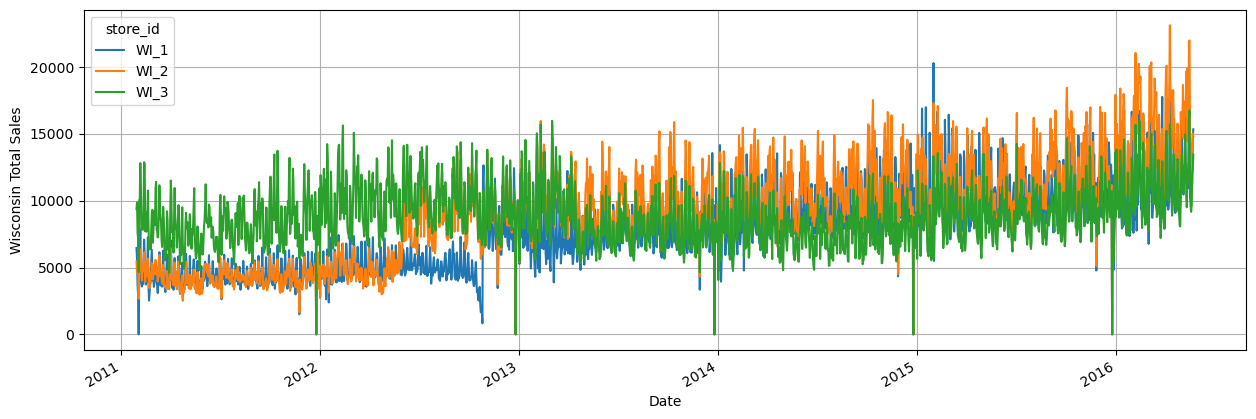

In [18]:
wi_store_sales_sum.plot(legend=True,
                        figsize=(15,5),
                        grid=True,
                        ylabel="Wisconsin Total Sales",
                        xlabel="Date",
                        x_compat=True)
ax = plt.gca()

<Axes: title={'center': '30 days moving window (mean)'}, xlabel='date'>

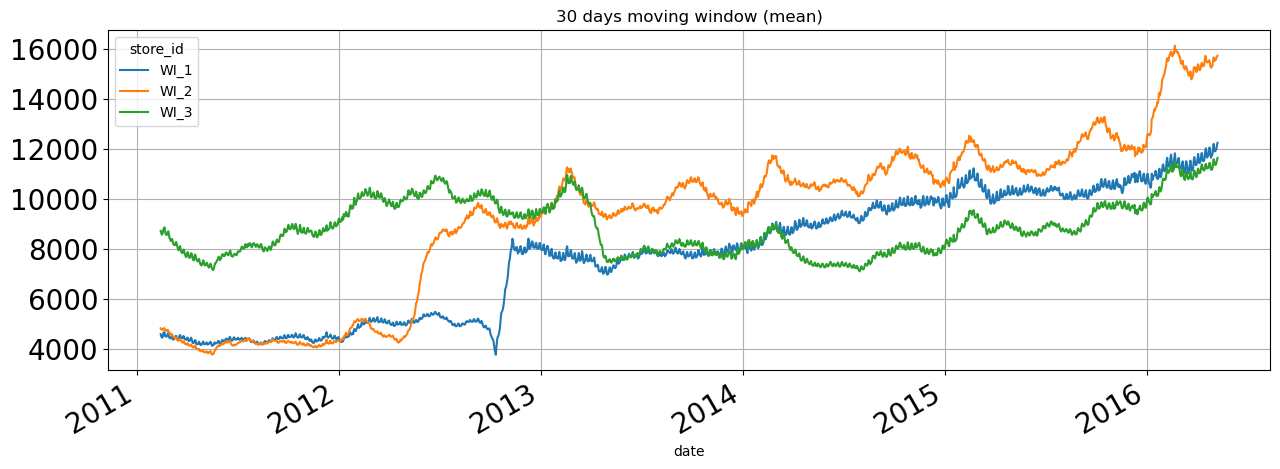

In [19]:
wi_store_sales_sum.rolling(30, center=True).mean().plot(figsize=(15,5), title='30 days moving window (mean)', 
                                                        fontsize=20, grid=True, x_compat=True)

Text(0.5, 0.98, 'California')

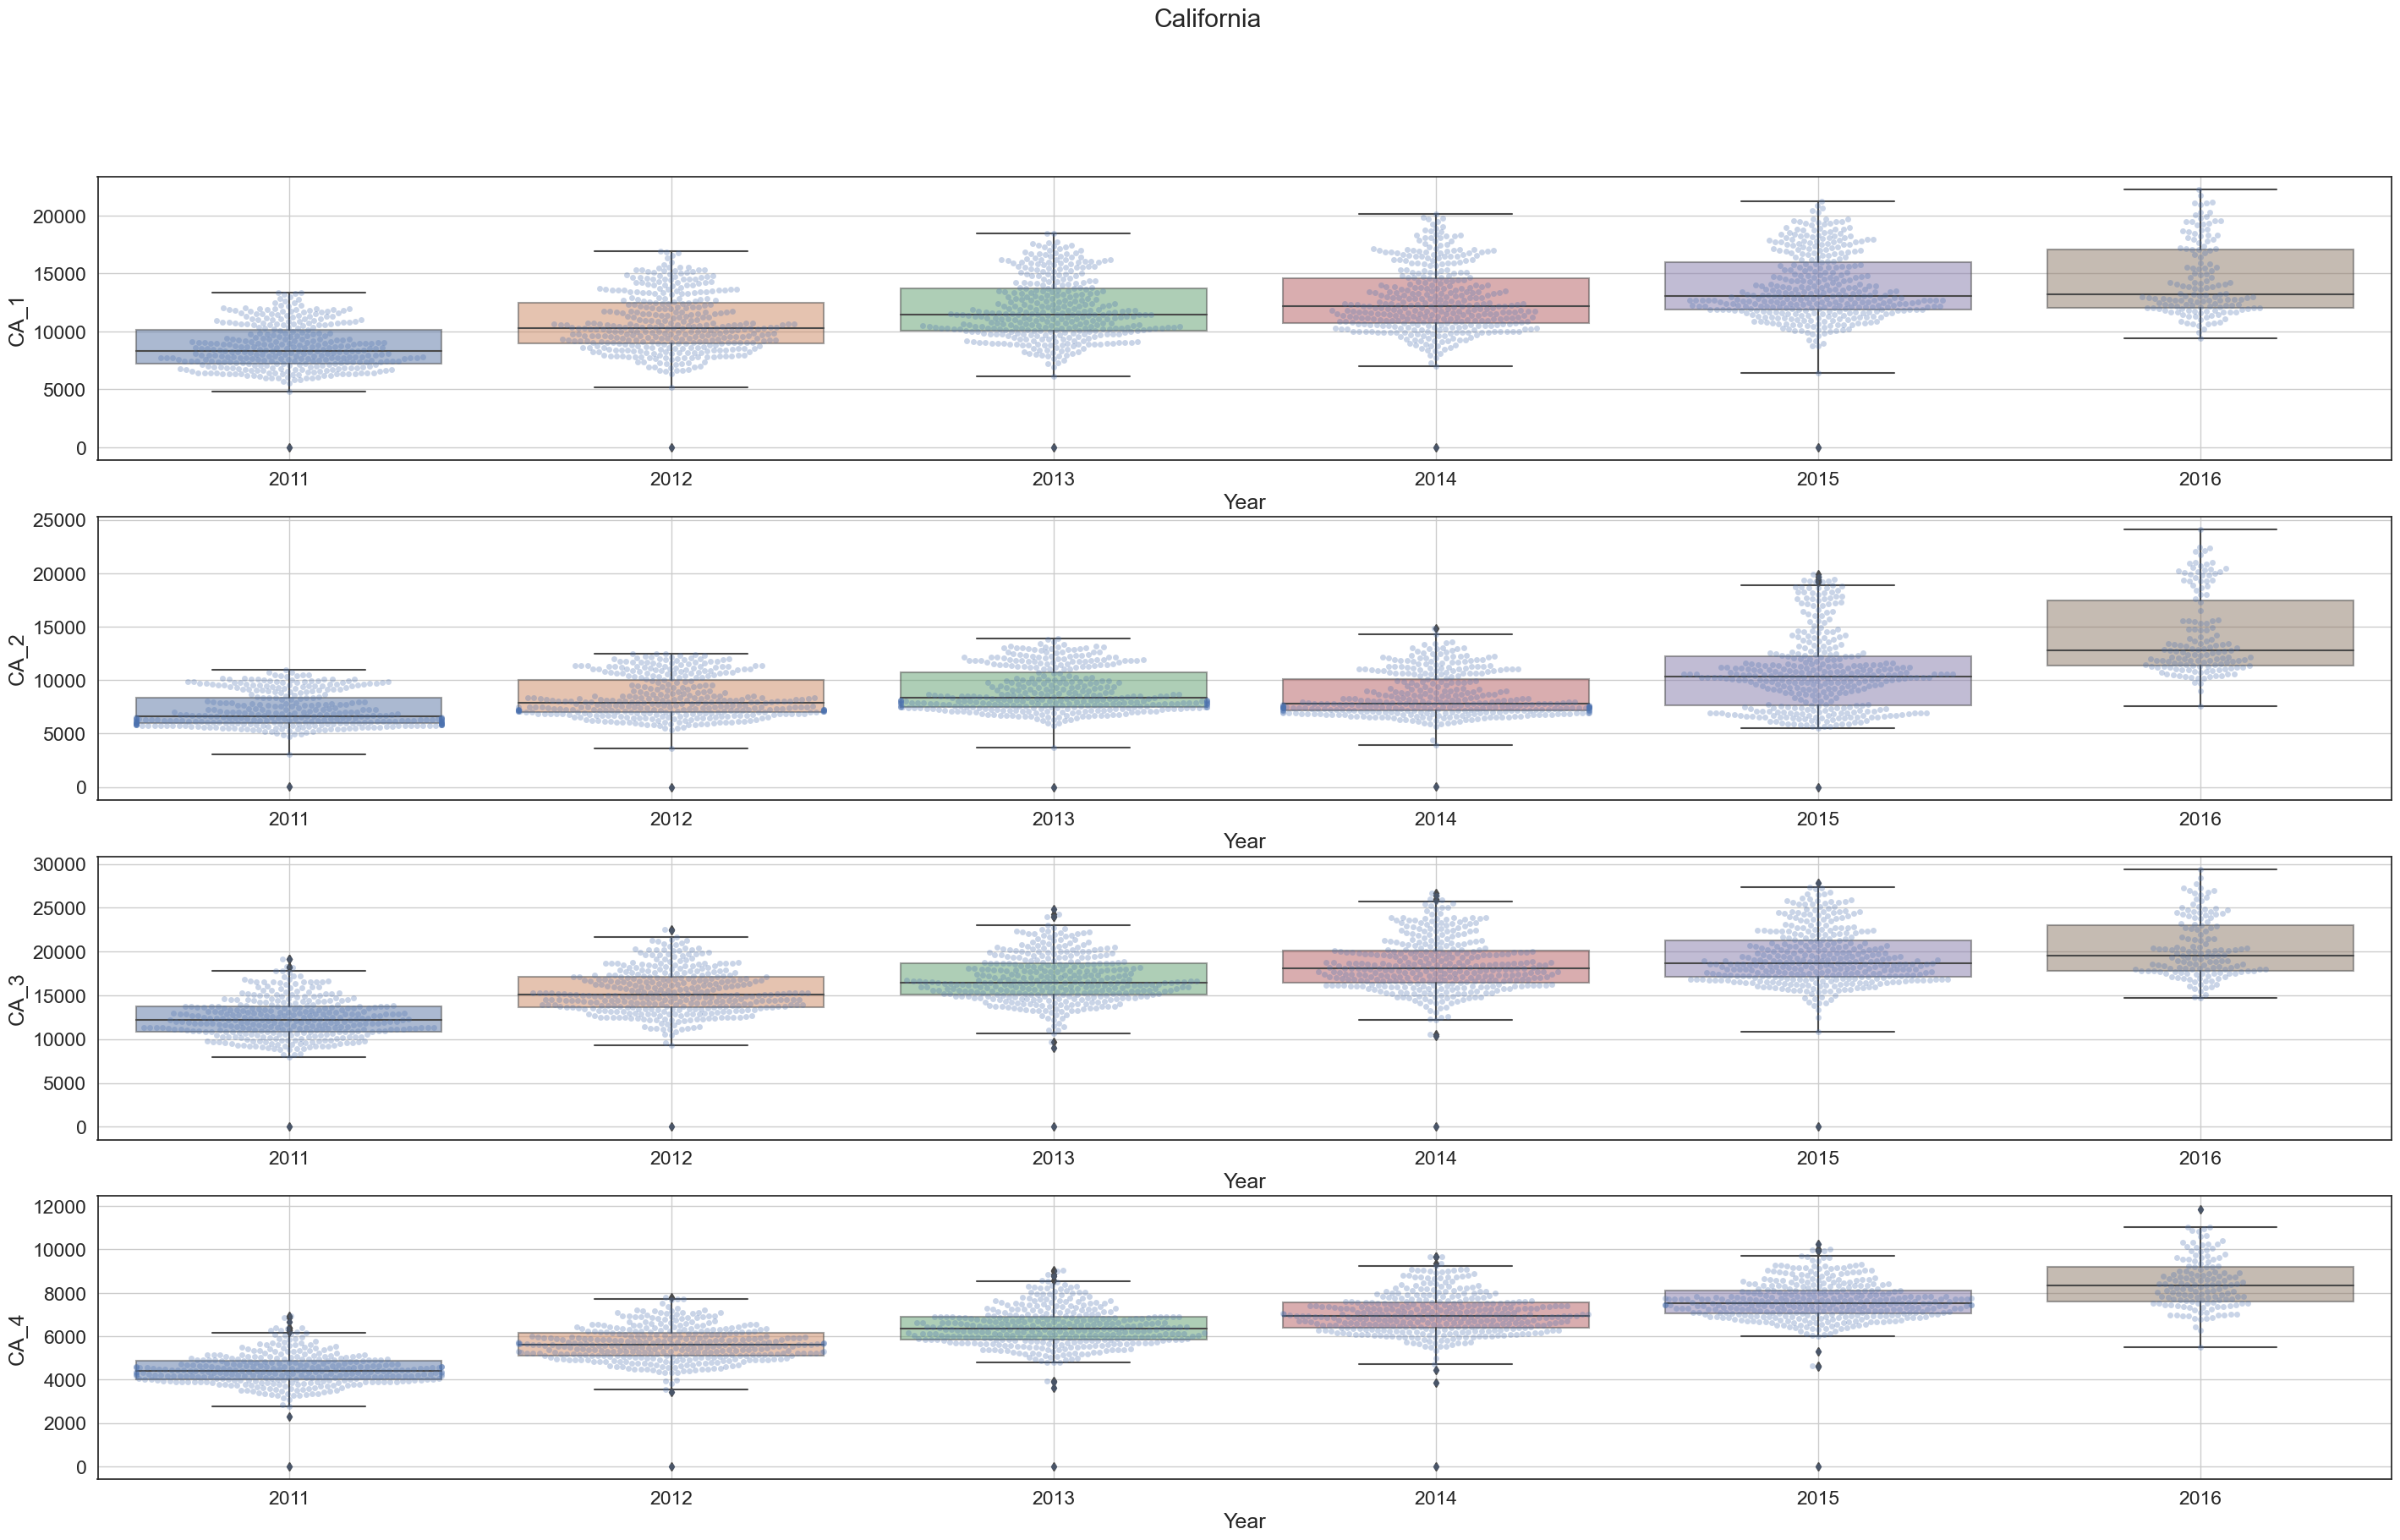

In [25]:
fig, axes = plt.subplots(figsize= (35,20), nrows=4, ncols=1)
sns.set(style='white', font_scale=1.5)
for i in range(4):    
    sns.boxplot(ax=axes[i], x=ca_store_sales_sum.index.year.tolist(),y=f'CA_{i+1}', data=ca_store_sales_sum, 
                boxprops=dict(alpha=.5));
    sns.swarmplot(y=f'CA_{i+1}', ax=axes[i], data=ca_store_sales_sum, x=ca_store_sales_sum.index.year.tolist(), 
                alpha=.3)
#     axes[i].set_title(f"California Store {i+1}")
    axes[i].set_xlabel('Year')
    axes[i].grid(True)
fig.suptitle("California")

Text(0.5, 0.98, 'Texas')

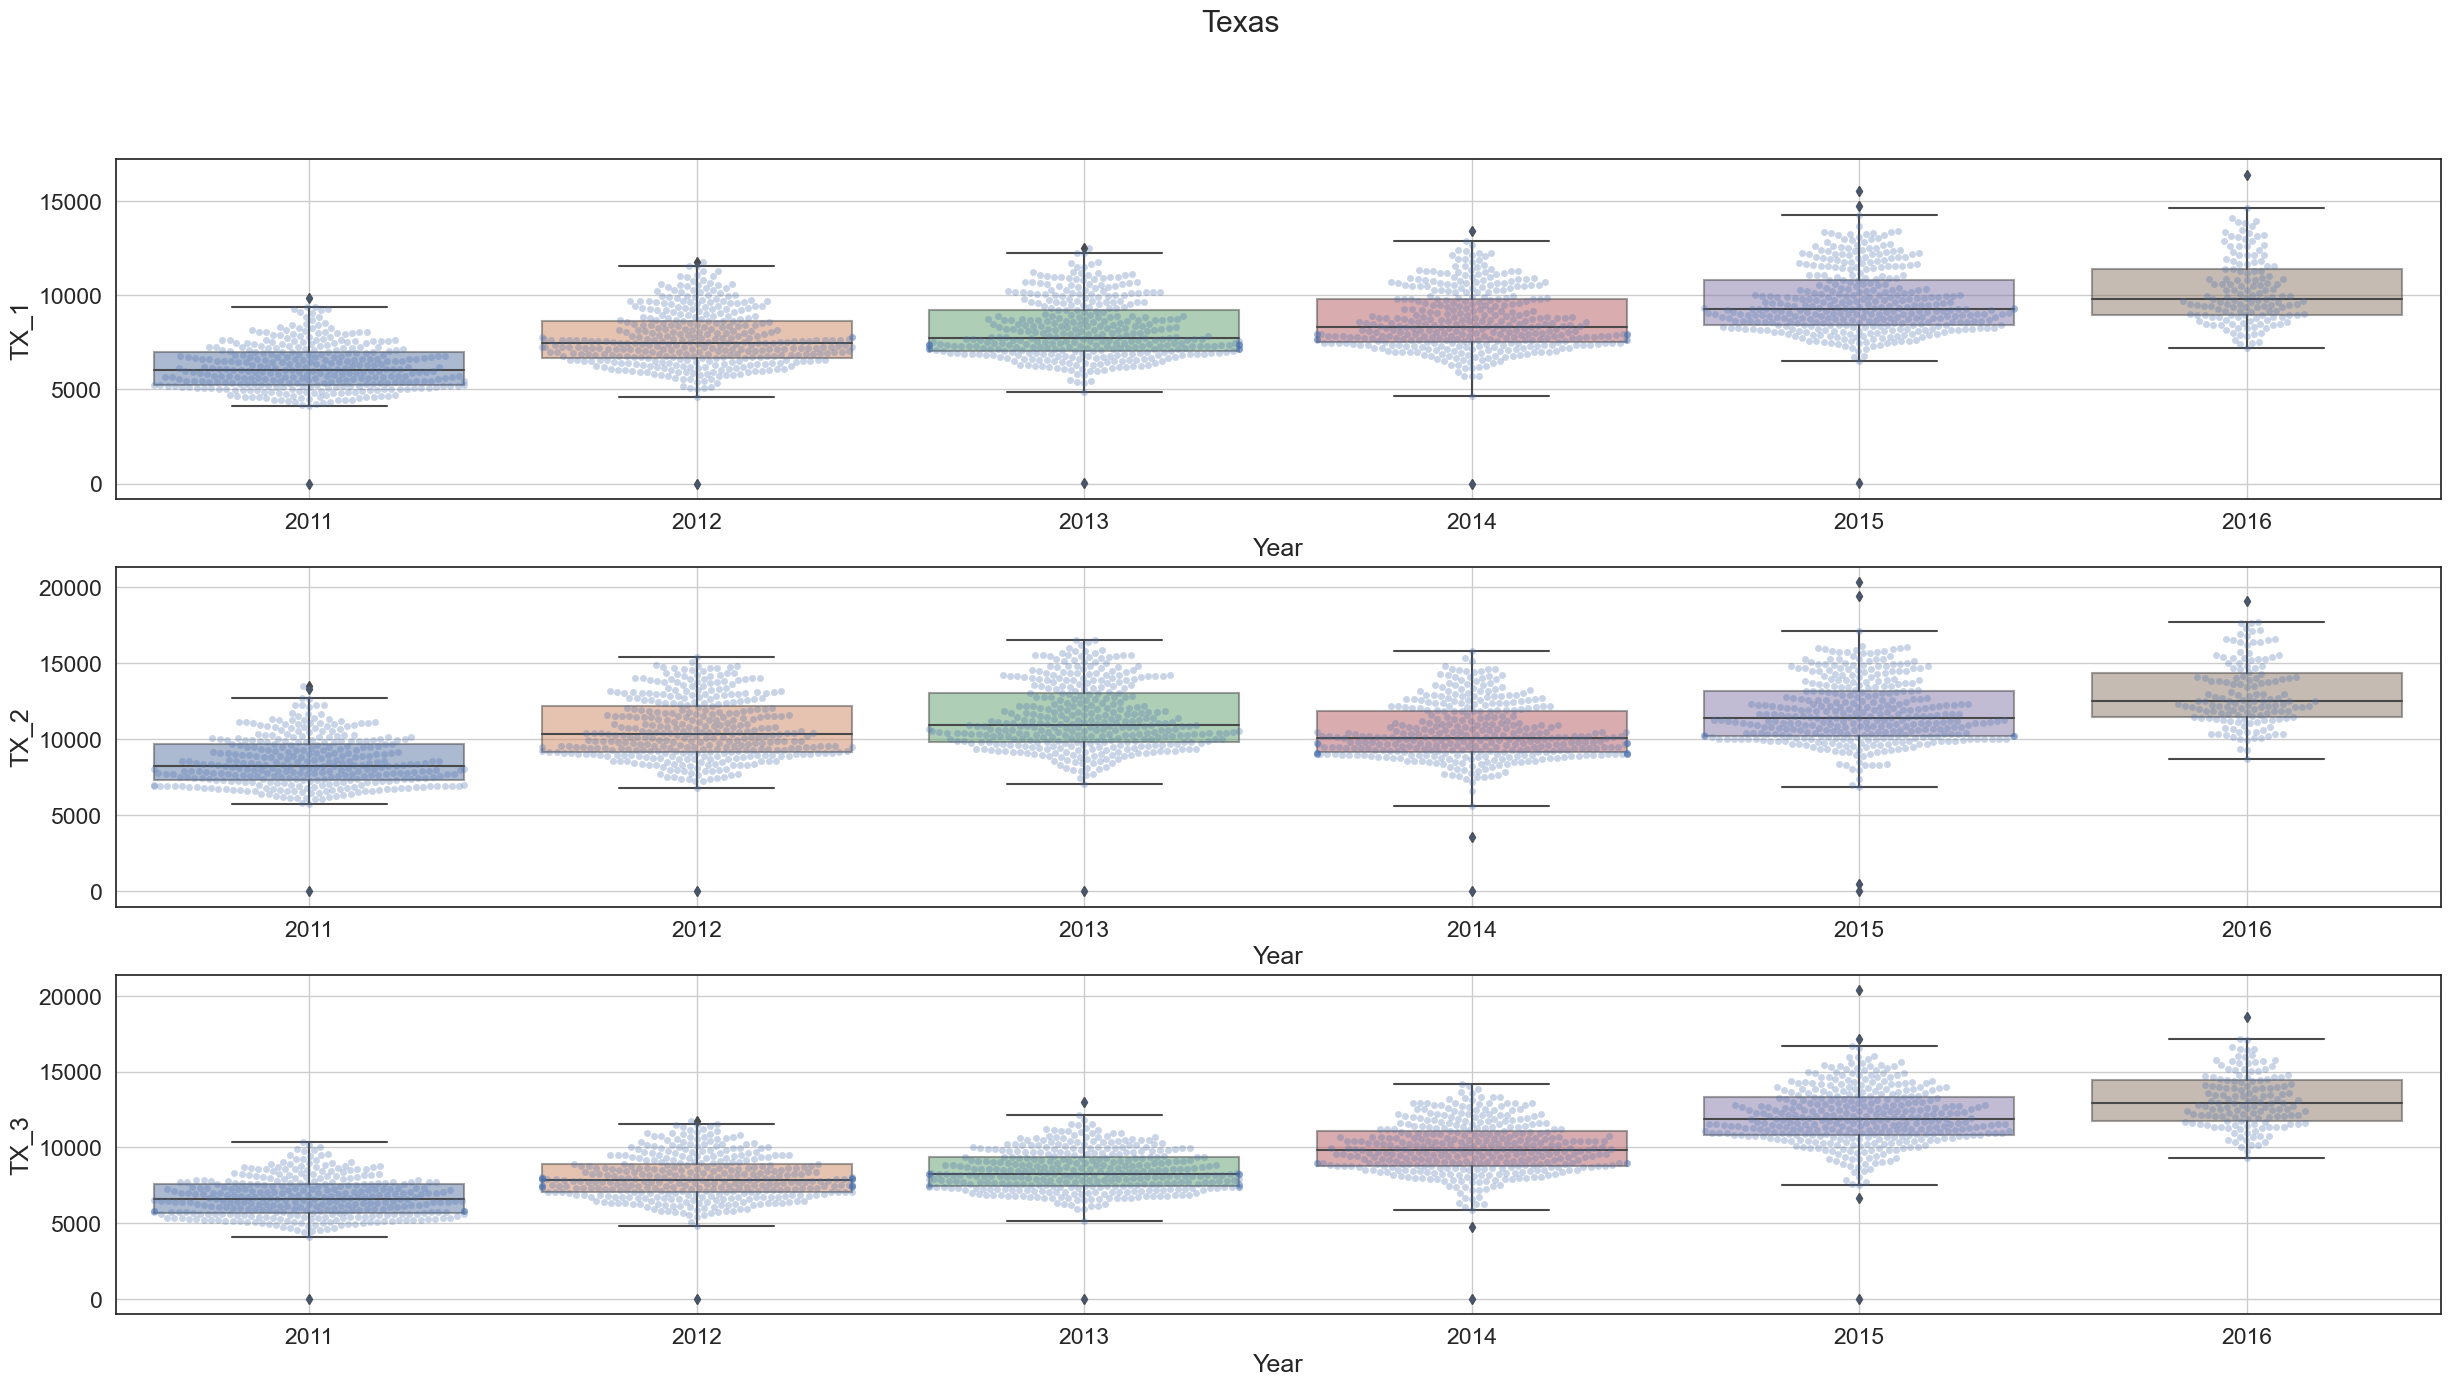

In [26]:
fig, axes = plt.subplots(figsize= (30,15), nrows=3, ncols=1)
sns.set(style='white', font_scale=1.5)
for i in range(3):    
    sns.boxplot(ax=axes[i], x=tx_store_sales_sum.index.year.tolist(),y=f'TX_{i+1}', data=tx_store_sales_sum, 
                boxprops=dict(alpha=.5));
    sns.swarmplot(y=f'TX_{i+1}', ax=axes[i], data=tx_store_sales_sum, x=tx_store_sales_sum.index.year.tolist(),
                 alpha=.3)
#     axes[i].set_title(f"Texas Store {i+1}")
    axes[i].set_xlabel('Year')
    axes[i].grid(True)
fig.suptitle("Texas")

Text(0.5, 0.98, 'Wisconsin')

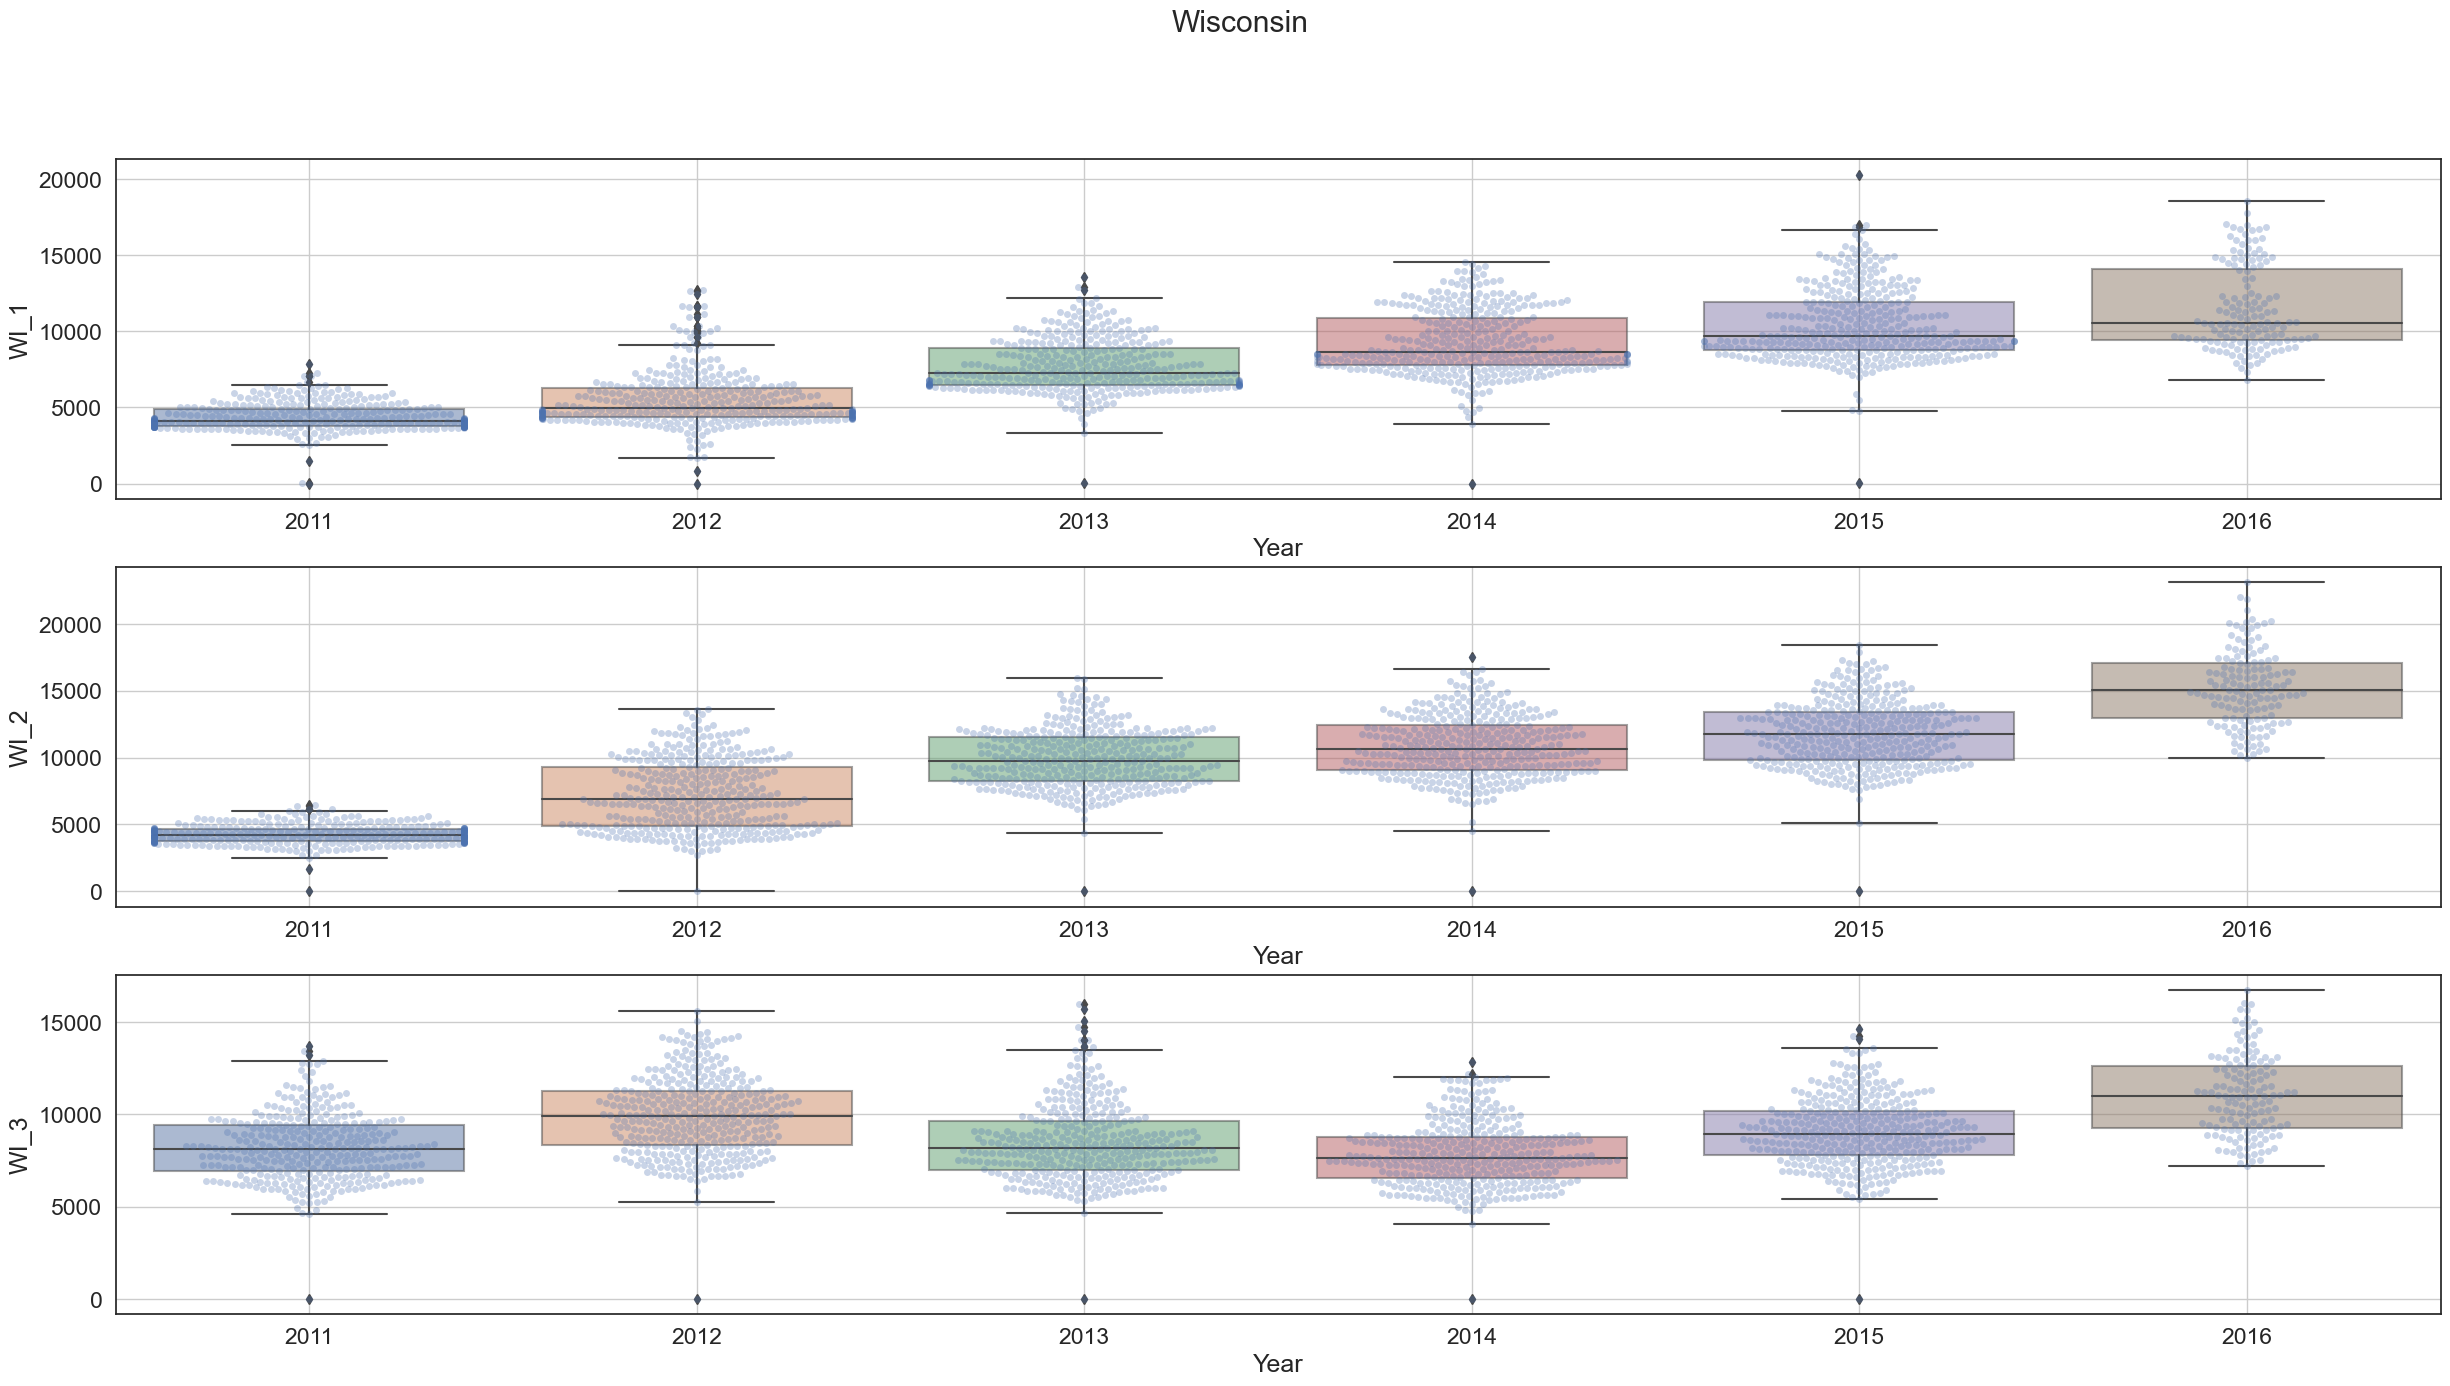

In [27]:
fig, axes = plt.subplots(figsize= (30,15), nrows=3, ncols=1)
sns.set(style='white', font_scale=1.5)
for i in range(3):    
    sns.boxplot(ax=axes[i], x=wi_store_sales_sum.index.year.tolist(),y=f'WI_{i+1}', data=wi_store_sales_sum, 
                boxprops=dict(alpha=.5));
    sns.swarmplot(y=f'WI_{i+1}', ax=axes[i], data=wi_store_sales_sum, x=wi_store_sales_sum.index.year.tolist(),
                 alpha=.3)
#     axes[i].set_title(f"Wisconsin Store {i+1}")
    axes[i].set_xlabel('Year')
    axes[i].grid(True)
fig.suptitle("Wisconsin")
# fig.tight_layout()

# Lag Features

In [49]:
ca1_df, ca2_df, ca3_df, ca4_df = [ca_store_sales_sum[i].copy().to_frame().rename(columns={i: 'total_sales'}) for i in ["CA_1","CA_2","CA_3","CA_4"]]
tx1_df, tx2_df, tx3_df = [tx_store_sales_sum[i].copy().to_frame().rename(columns={i: 'total_sales'}) for i in ["TX_1","TX_2","TX_3"]]
wi1_df, wi2_df, wi3_df = [wi_store_sales_sum[i].copy().to_frame().rename(columns={i: 'total_sales'}) for i in ["WI_1","WI_2", "WI_3"]]

In [50]:
display(ca1_df.head())
# display(tx2_df.head())
# display(tx3_df.head())

,total_sales
date,
2011-01-29,10933.16
2011-01-30,9787.06
2011-01-31,7201.38
2011-02-01,7407.74
2011-02-02,6566.12


,total_sales
date,
2011-01-29,9915.78
2011-01-30,9804.54
2011-01-31,6651.16
2011-02-01,6985.60
2011-02-02,6039.05


,total_sales
date,
2011-01-29,7597.99
2011-01-30,7356.54
2011-01-31,5406.70
2011-02-01,5597.97
2011-02-02,4069.74


In [51]:
def set_lag_features(df):
    target_map = df['total_sales'].to_dict()
    df['lag1'] = (df.index - pd.Timedelta('364 days')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('728 days')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('1092 days')).map(target_map)
    return df

In [52]:
# lag features for California
ca1_df = set_lag_features(ca1_df)
ca2_df = set_lag_features(ca2_df)
ca3_df = set_lag_features(ca3_df)
ca4_df = set_lag_features(ca4_df)

# lag features for 
tx1_df = set_lag_features(tx1_df)
tx2_df = set_lag_features(tx2_df)
tx3_df = set_lag_features(tx3_df)

# lag features for 
wi1_df = set_lag_features(wi1_df)
wi2_df = set_lag_features(wi2_df)
wi3_df = set_lag_features(wi3_df)

In [53]:
print("CA1 Head")
display(ca1_df.head())

print("CA1 Tail")
display(ca1_df.tail())

CA1 Head


,total_sales,lag1,lag2,lag3
date,,,,
2011-01-29,10933.16,NaN,NaN,NaN
2011-01-30,9787.06,NaN,NaN,NaN
2011-01-31,7201.38,NaN,NaN,NaN
2011-02-01,7407.74,NaN,NaN,NaN
2011-02-02,6566.12,NaN,NaN,NaN


CA1 Tail


,total_sales,lag1,lag2,lag3
date,,,,
2016-05-18,12920.62,11266.68,9799.19,9869.71
2016-05-19,13259.90,11181.34,9862.32,10021.93
2016-05-20,13999.65,14392.40,11743.45,12387.69
2016-05-21,18637.70,16860.43,13620.88,13502.41
2016-05-22,21110.44,17496.42,13460.66,12594.23


# Adding Calendar Features

In [54]:
calendar_df['date'] = pd.to_datetime(calendar_df['date'])

In [55]:
# California
ca_features = ['date','wday', 'month', 'year', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA']

ca1_df = pd.merge(left=ca1_df, right=calendar_df[ca_features], 
                  how='left', left_index=True, right_on='date').set_index('date')
ca2_df = pd.merge(left=ca2_df, right=calendar_df[ca_features], 
                  how='left', left_index=True, right_on='date').set_index('date')
ca3_df = pd.merge(left=ca3_df, right=calendar_df[ca_features], 
                  how='left', left_index=True, right_on='date').set_index('date')
ca4_df = pd.merge(left=ca4_df, right=calendar_df[ca_features], 
                  how='left', left_index=True, right_on='date').set_index('date')
display(ca1_df.tail())

# Texas
tx_features = ['date','wday', 'month', 'year', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_TX']
tx1_df = pd.merge(left=tx1_df, right=calendar_df[tx_features], 
                  how='left', left_index=True, right_on='date').set_index('date')
tx2_df = pd.merge(left=tx2_df, right=calendar_df[tx_features], 
                  how='left', left_index=True, right_on='date').set_index('date')
tx3_df = pd.merge(left=tx3_df, right=calendar_df[tx_features], 
                  how='left', left_index=True, right_on='date').set_index('date')
display(tx2_df.tail())

# Wisconsin
wi_features = ['date','wday', 'month', 'year', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_WI']
wi1_df = pd.merge(left=wi1_df, right=calendar_df[wi_features], 
                  how='left', left_index=True, right_on='date').set_index('date')
wi2_df = pd.merge(left=wi2_df, right=calendar_df[wi_features], 
                  how='left', left_index=True, right_on='date').set_index('date')
wi3_df = pd.merge(left=wi3_df, right=calendar_df[wi_features], 
                  how='left', left_index=True, right_on='date').set_index('date')
display(wi3_df.tail())

,total_sales,lag1,lag2,lag3,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA
date,,,,,,,,,,,,
2016-05-18,12920.62,11266.68,9799.19,9869.71,5,5,2016,NaN,NaN,NaN,NaN,0
2016-05-19,13259.90,11181.34,9862.32,10021.93,6,5,2016,NaN,NaN,NaN,NaN,0
2016-05-20,13999.65,14392.40,11743.45,12387.69,7,5,2016,NaN,NaN,NaN,NaN,0
2016-05-21,18637.70,16860.43,13620.88,13502.41,1,5,2016,NaN,NaN,NaN,NaN,0
2016-05-22,21110.44,17496.42,13460.66,12594.23,2,5,2016,NaN,NaN,NaN,NaN,0


,total_sales,lag1,lag2,lag3,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX
date,,,,,,,,,,,,
2016-05-18,11121.03,10305.24,8481.92,9780.22,5,5,2016,NaN,NaN,NaN,NaN,0
2016-05-19,10474.33,9905.42,8886.55,9466.07,6,5,2016,NaN,NaN,NaN,NaN,0
2016-05-20,13832.01,11365.44,10144.14,12188.14,7,5,2016,NaN,NaN,NaN,NaN,0
2016-05-21,15212.81,14078.83,12049.33,13723.85,1,5,2016,NaN,NaN,NaN,NaN,0
2016-05-22,17631.81,13169.14,11439.88,13699.23,2,5,2016,NaN,NaN,NaN,NaN,0


,total_sales,lag1,lag2,lag3,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_WI
date,,,,,,,,,,,,
2016-05-18,9163.29,6585.51,5549.08,5508.92,5,5,2016,NaN,NaN,NaN,NaN,0
2016-05-19,9660.13,6940.78,5882.96,6771.04,6,5,2016,NaN,NaN,NaN,NaN,0
2016-05-20,11982.37,8651.91,7204.27,7272.76,7,5,2016,NaN,NaN,NaN,NaN,0
2016-05-21,12370.23,9212.40,7574.95,8092.73,1,5,2016,NaN,NaN,NaN,NaN,0
2016-05-22,13432.85,8270.40,7238.20,6835.05,2,5,2016,NaN,NaN,NaN,NaN,0


# Categorical to Numerical Encoding

In [58]:
# California
ca1_df_dummy = pd.get_dummies(ca1_df, columns=[ 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2'])
ca2_df_dummy = pd.get_dummies(ca2_df, columns=[ 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2'])
ca3_df_dummy = pd.get_dummies(ca3_df, columns=[ 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2'])
ca4_df_dummy = pd.get_dummies(ca4_df, columns=[ 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2'])
display(ca1_df_dummy.head())

# Texas
tx1_df_dummy = pd.get_dummies(tx1_df, columns=[ 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2'])
tx2_df_dummy = pd.get_dummies(tx2_df, columns=[ 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2'])
tx3_df_dummy = pd.get_dummies(tx3_df, columns=[ 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2'])
# display(tx1_df_dummy.head())

# Wisconsin
wi1_df_dummy = pd.get_dummies(wi1_df, columns=[ 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2'])
wi2_df_dummy = pd.get_dummies(wi2_df, columns=[ 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2'])
wi3_df_dummy = pd.get_dummies(wi3_df, columns=[ 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2'])
# display(wi1_df_dummy.head())

,total_sales,lag1,lag2,lag3,wday,month,year,snap_CA,event_name_1_Chanukah End,event_name_1_Christmas,event_name_1_Cinco De Mayo,event_name_1_ColumbusDay,event_name_1_Easter,event_name_1_Eid al-Fitr,event_name_1_EidAlAdha,event_name_1_Father's day,event_name_1_Halloween,event_name_1_IndependenceDay,event_name_1_LaborDay,event_name_1_LentStart,event_name_1_LentWeek2,event_name_1_MartinLutherKingDay,event_name_1_MemorialDay,event_name_1_Mother's day,event_name_1_NBAFinalsEnd,event_name_1_NBAFinalsStart,event_name_1_NewYear,event_name_1_OrthodoxChristmas,event_name_1_OrthodoxEaster,event_name_1_Pesach End,event_name_1_PresidentsDay,event_name_1_Purim End,event_name_1_Ramadan starts,event_name_1_StPatricksDay,event_name_1_SuperBowl,event_name_1_Thanksgiving,event_name_1_ValentinesDay,event_name_1_VeteransDay,event_type_1_Cultural,event_type_1_National,event_type_1_Religious,event_type_1_Sporting,event_name_2_Cinco De Mayo,event_name_2_Easter,event_name_2_Father's day,event_name_2_OrthodoxEaster,event_type_2_Cultural,event_type_2_Religious
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-29,10933.16,NaN,NaN,NaN,1,1,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2011-01-30,9787.06,NaN,NaN,NaN,2,1,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2011-01-31,7201.38,NaN,NaN,NaN,3,1,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2011-02-01,7407.74,NaN,NaN,NaN,4,2,2011,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2011-02-02,6566.12,NaN,NaN,NaN,5,2,2011,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Create First Model

In [74]:
common_features = ['wday', 'month', 'year', '', 'lag1', 'lag2',
                  'lag3', 'event_name_1_Chanukah End', 'event_name_1_Christmas',
                  'event_name_1_Cinco De Mayo', 'event_name_1_ColumbusDay',
                  'event_name_1_Easter', 'event_name_1_Eid al-Fitr',
                  'event_name_1_EidAlAdha', "event_name_1_Father's day",
                  'event_name_1_Halloween', 'event_name_1_IndependenceDay',
                  'event_name_1_LaborDay', 'event_name_1_LentStart',
                  'event_name_1_LentWeek2', 'event_name_1_MartinLutherKingDay',       
                  'event_name_1_MemorialDay', "event_name_1_Mother's day",
                  'event_name_1_NBAFinalsEnd', 'event_name_1_NBAFinalsStart',
                  'event_name_1_NewYear', 'event_name_1_OrthodoxChristmas',
                  'event_name_1_OrthodoxEaster', 'event_name_1_Pesach End',
                  'event_name_1_PresidentsDay', 'event_name_1_Purim End',
                  'event_name_1_Ramadan starts', 'event_name_1_StPatricksDay',
                  'event_name_1_SuperBowl', 'event_name_1_Thanksgiving',
                  'event_name_1_ValentinesDay', 'event_name_1_VeteransDay',
                  'event_type_1_Cultural', 'event_type_1_National',
                  'event_type_1_Religious', 'event_type_1_Sporting',
                  'event_name_2_Cinco De Mayo', 'event_name_2_Easter',
                  "event_name_2_Father's day", "event_name_2_OrthodoxEaster",
                  'event_type_2_Cultural', 'event_type_2_Religious']
model_target = 'total_sales'

In [134]:
def create_model(df, feature, plot_data=False):
    train_plt = df['total_sales'].loc[df.index < '2016-05-01']
    test_plt = df['total_sales'].loc[df.index >= '2016-05-01']
    
    if plot_data:
        # Plottig the train/test split
        fig, axes = plt.subplots(figsize=(15,5))
        train_plt.plot(ax=axes, label='Training Set', title= 'Data Simple Train/Test Split')
        test_plt.plot(ax=axes, label='Test Set')
        axes.axvline('2016-05-01', color='black', ls='--')
        axes.legend(['Training Set', 'Test Set'])
        plt.show()
    
    train_df = df.loc[df.index < '2016-05-01']
    test_df = df.loc[df.index >= '2016-05-01']
    
    features = common_features
    features[3] = feature
    
    X_train = train_df[features]
    y_train = train_df[model_target]

    X_test = test_df[common_features]
    y_test = test_df[model_target]
    
    return X_train, y_train, X_test, y_test, test_df


In [172]:
def fit_model(X_train, y_train, X_test, y_test, test_df, pred_plt_df, col_suff, imp_plt_df,
              n_est=1000, early_stop=100, learn_rate=.1, verbose=100):
    reg = xgb.XGBRegressor(n_estimators=n_est, 
                           early_stopping_rounds=early_stop,
                           learning_rate=learn_rate)
    reg.fit(X_train, y_train,
           eval_set = [(X_train, y_train), (X_test, y_test)],
           verbose=verbose)
    
    test_df['prediction'] = reg.predict(X_test)
    
    pred_plt_df = pd.merge(left=pred_plt_df, right=test_df[['total_sales', 'prediction']], 
                           left_index=True, right_index=True)
    pred_plt_df.rename(columns={'total_sales': f'ts_{col_suff}', 'prediction': f'p_{col_suff}'}, inplace=True)
    
    if imp_plt_df.shape[0] == 0:
        imp_plt_df = pd.DataFrame(index=reg.feature_names_in_)
        
    fea_imp = pd.DataFrame(data=reg.feature_importances_, index=reg.feature_names_in_, 
                           columns=[f'importance_{col_suff}'])
    imp_plt_df = pd.merge(left=imp_plt_df, right= fea_imp, how='left', left_index=True, right_index=True)
    
    model_1_score = np.sqrt(mean_squared_error(test_df['total_sales'], test_df['prediction']))

    return model_1_score, reg, pred_plt_df, imp_plt_df


def plot_fea_imp(reg):
    fea_imp = pd.DataFrame(data=reg.feature_importances_,
            index=reg.feature_names_in_,
            columns=['importance'])
    fea_imp.sort_values('importance').plot(kind='barh', title='Feature Importance',fontsize=8, grid=True)
    plt.show()

    
def plot_preds(X_test, test_df, input_df, reg):
    df = input_df.copy()
    
    
    df = df.merge(test_df[['prediction']], how='left', left_index=True, right_index=True)
    
    ax = df[['total_sales']].loc[df.index >= '2016-05-01'].plot(figsize=(15,5))
    df['prediction'].loc[df.index >= '2016-05-01'].plot(ax=ax, style='.-')
    plt.legend(['Truth Data', 'Predictions'])
    ax.set_title('Raw Data and Predeiction')
    plt.show()
    
#     model_1_score = np.sqrt(mean_squared_error(test_df['total_sales'], test_df['prediction']))
#     print(f'Root Mean Squared Error (RMSE) on Test set: {model_1_score:.2f}')

In [79]:
# California
ca1_X_train, ca1_y_train, ca1_X_test, ca1_y_test, ca1_test_df = create_model(ca1_df_dummy, 'snap_CA', plot_data=False)
ca2_X_train, ca2_y_train, ca2_X_test, ca2_y_test, ca2_test_df = create_model(ca2_df_dummy, 'snap_CA', plot_data=False)
ca3_X_train, ca3_y_train, ca3_X_test, ca3_y_test, ca3_test_df = create_model(ca3_df_dummy, 'snap_CA', plot_data=False)
ca4_X_train, ca4_y_train, ca4_X_test, ca4_y_test, ca4_test_df = create_model(ca4_df_dummy, 'snap_CA', plot_data=False)

# Texas
tx1_X_train, tx1_y_train, tx1_X_test, tx1_y_test, tx1_test_df = create_model(tx1_df_dummy, 'snap_TX', plot_data=False)
tx2_X_train, tx2_y_train, tx2_X_test, tx2_y_test, tx2_test_df = create_model(tx2_df_dummy, 'snap_TX', plot_data=False)
tx3_X_train, tx3_y_train, tx3_X_test, tx3_y_test, tx3_test_df = create_model(tx3_df_dummy, 'snap_TX', plot_data=False)

# Wisconsin
wi1_X_train, wi1_y_train, wi1_X_test, wi1_y_test, wi1_test_df = create_model(wi1_df_dummy, 'snap_WI', plot_data=False)
wi2_X_train, wi2_y_train, wi2_X_test, wi2_y_test, wi2_test_df = create_model(wi2_df_dummy, 'snap_WI', plot_data=False)
wi3_X_train, wi3_y_train, wi3_X_test, wi3_y_test, wi3_test_df = create_model(wi3_df_dummy, 'snap_WI', plot_data=False)

In [173]:
# data frame to keep all predictions
pred_plotting_df = pd.DataFrame(index= ca1_df.index)
imp_plotting_df = pd.DataFrame()
# imp_plotting_df = pd.DataFrame(index= ca1_df.index)
# acc_plotting_df = pd.merge(left=acc_plotting_df, right=ca1_test_df[['total_sales', 'prediction']], 
#                           left_index=True, right_index=True)
# acc_plotting_df.rename(columns={'total_sales':'ts_ca1', 'prediction':'p_ca1'}, inplace=True)
# acc_plotting_df = pd.merge(left=acc_plotting_df, right=ca2_test_df[['total_sales', 'prediction']], 
#                           left_index=True, right_index=True)
# acc_plotting_df.rename(columns={'total_sales':'ts_ca2', 'prediction':'p_ca2'}, inplace=True)
# acc_plotting_df = pd.merge(left=acc_plotting_df, right=ca3_test_df[['total_sales', 'prediction']], 
#                           left_index=True, right_index=True)
# acc_plotting_df.rename(columns={'total_sales':'ts_ca3', 'prediction':'p_ca3'}, inplace=True)
# acc_plotting_df = pd.merge(left=acc_plotting_df, right=ca4_test_df[['total_sales', 'prediction']], 
#                           left_index=True, right_index=True)
# acc_plotting_df.rename(columns={'total_sales':'ts_ca4', 'prediction':'p_ca4'}, inplace=True)
pred_plotting_df.head()
imp_plotting_df.shape[0]

0

In [174]:
# fitting model for California
pred_plotting_df = pd.DataFrame(index= ca1_df.index)
imp_plotting_df = pd.DataFrame()
ca1_score, ca1_reg, pred_plotting_df, imp_plotting_df = fit_model(ca1_X_train, ca1_y_train, ca1_X_test, ca1_y_test, 
                                                                  ca1_test_df, pred_plotting_df, 'ca1', imp_plotting_df,
                                                                  n_est=1000, early_stop=100, learn_rate=.1, verbose=100)
ca2_score, ca2_reg, pred_plotting_df, imp_plotting_df = fit_model(ca2_X_train, ca2_y_train, ca2_X_test, ca2_y_test, 
                                                                  ca2_test_df, pred_plotting_df, 'ca2', imp_plotting_df,
                                                                  n_est=1000, early_stop=100, learn_rate=.8, verbose=100)
ca3_score, ca3_reg, pred_plotting_df, imp_plotting_df = fit_model(ca3_X_train, ca3_y_train, ca3_X_test, ca3_y_test, 
                                                                  ca3_test_df, pred_plotting_df, 'ca3', imp_plotting_df,
                                                                  n_est=1000, early_stop=100, learn_rate=.1, verbose=100)
ca4_score, ca4_reg, pred_plotting_df, imp_plotting_df = fit_model(ca4_X_train, ca4_y_train, ca4_X_test, ca4_y_test, 
                                                                  ca4_test_df, pred_plotting_df, 'ca4', imp_plotting_df,
                                                                  n_est=1000, early_stop=100, learn_rate=.01, verbose=100)

[0]	validation_0-rmse:11000.67475	validation_1-rmse:14731.84422
[100]	validation_0-rmse:563.17165	validation_1-rmse:1408.74723
[200]	validation_0-rmse:446.19539	validation_1-rmse:1380.34318
[263]	validation_0-rmse:398.36583	validation_1-rmse:1384.01543
[0]	validation_0-rmse:2318.14029	validation_1-rmse:6319.89176
[100]	validation_0-rmse:174.10384	validation_1-rmse:1780.28140
[141]	validation_0-rmse:165.28830	validation_1-rmse:1775.83459
[0]	validation_0-rmse:15520.85625	validation_1-rmse:19695.08107
[100]	validation_0-rmse:741.40669	validation_1-rmse:1417.02229
[169]	validation_0-rmse:633.12152	validation_1-rmse:1462.44414
[0]	validation_0-rmse:6490.56106	validation_1-rmse:9383.01248
[100]	validation_0-rmse:2440.72425	validation_1-rmse:4212.52899
[200]	validation_0-rmse:993.68677	validation_1-rmse:2265.76817
[300]	validation_0-rmse:520.17170	validation_1-rmse:1511.96272
[400]	validation_0-rmse:387.64800	validation_1-rmse:1211.11544
[500]	validation_0-rmse:346.18723	validation_1-rmse:10

In [247]:
# fitting model for Texas
tx_pred_plotting_df = pd.DataFrame(index= tx1_df.index)
tx_imp_plotting_df = pd.DataFrame()
tx1_score, tx1_reg, tx_pred_plotting_df, tx_imp_plotting_df = fit_model(tx1_X_train, tx1_y_train, tx1_X_test, tx1_y_test, 
                                                                        tx1_test_df, tx_pred_plotting_df, 'tx1', 
                                                                        tx_imp_plotting_df, n_est=1000, early_stop=100, 
                                                                        learn_rate=.2, verbose=100)
tx2_score, tx2_reg, tx_pred_plotting_df, tx_imp_plotting_df = fit_model(tx2_X_train, tx2_y_train, tx2_X_test, tx2_y_test, 
                                                                        tx2_test_df, tx_pred_plotting_df, 'tx2', 
                                                                        tx_imp_plotting_df, n_est=1000, early_stop=100, 
                                                                        learn_rate=.8, verbose=100)
tx3_score, tx3_reg, tx_pred_plotting_df, tx_imp_plotting_df = fit_model(tx3_X_train, tx3_y_train, tx3_X_test, tx3_y_test, 
                                                                        tx3_test_df, tx_pred_plotting_df, 'tx3', 
                                                                        tx_imp_plotting_df, n_est=1000, early_stop=100, 
                                                                        learn_rate=.2, verbose=100)

[0]	validation_0-rmse:6794.71943	validation_1-rmse:9490.27006
[100]	validation_0-rmse:341.70255	validation_1-rmse:1294.16201
[141]	validation_0-rmse:302.53404	validation_1-rmse:1285.81731
[0]	validation_0-rmse:2552.06986	validation_1-rmse:4260.42577
[100]	validation_0-rmse:264.80732	validation_1-rmse:1179.75642
[106]	validation_0-rmse:262.62394	validation_1-rmse:1173.07846
[0]	validation_0-rmse:7762.17809	validation_1-rmse:11994.54593
[100]	validation_0-rmse:379.27503	validation_1-rmse:1265.04346
[155]	validation_0-rmse:310.77141	validation_1-rmse:1259.00807


Text(0.5, 0.98, 'True Values vs Prediction for California Stores')

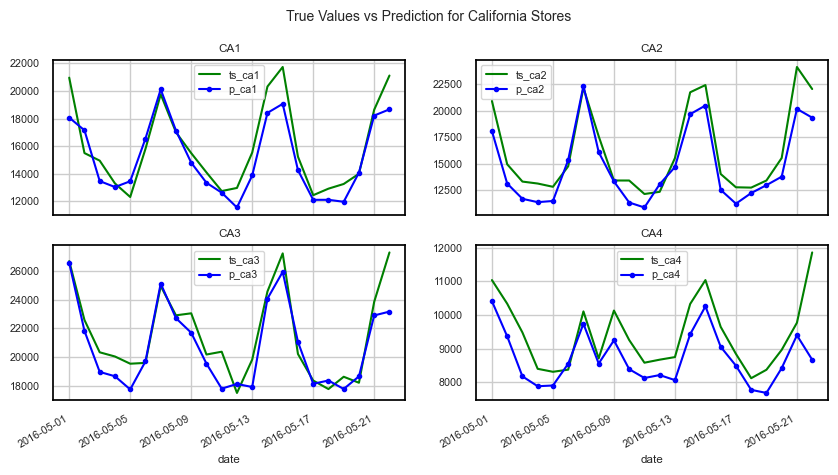

In [203]:
sns.set(style='white', font_scale=.7)
sns.set_style("whitegrid",{"axes.edgecolor": "black"})
fig, axes = plt.subplots(figsize=(10,5), nrows=2, ncols=2, sharex=True)
k = 0
for i in range(2):
    for j in range(2):      
        k += 1
        pred_plotting_df[[f'ts_ca{k}']].loc[pred_plotting_df.index >= '2016-05-01'].plot(ax=axes[i,j], grid=True, 
                                                                                         label=f'Test Set CA{k}',
                                                                                        title=f'CA{k}', legend=True,
                                                                                         x_compat=True)
        pred_plotting_df[[f'p_ca{k}']].loc[pred_plotting_df.index >= '2016-05-01'].plot(ax=axes[i,j], grid=True, 
                                                                                        style='.-', label=f'Pred Set CA{k}',
                                                                                       legend=True,x_compat=True,
                                                                                       color='blue')
fig.suptitle("True Values vs Prediction for California Stores")

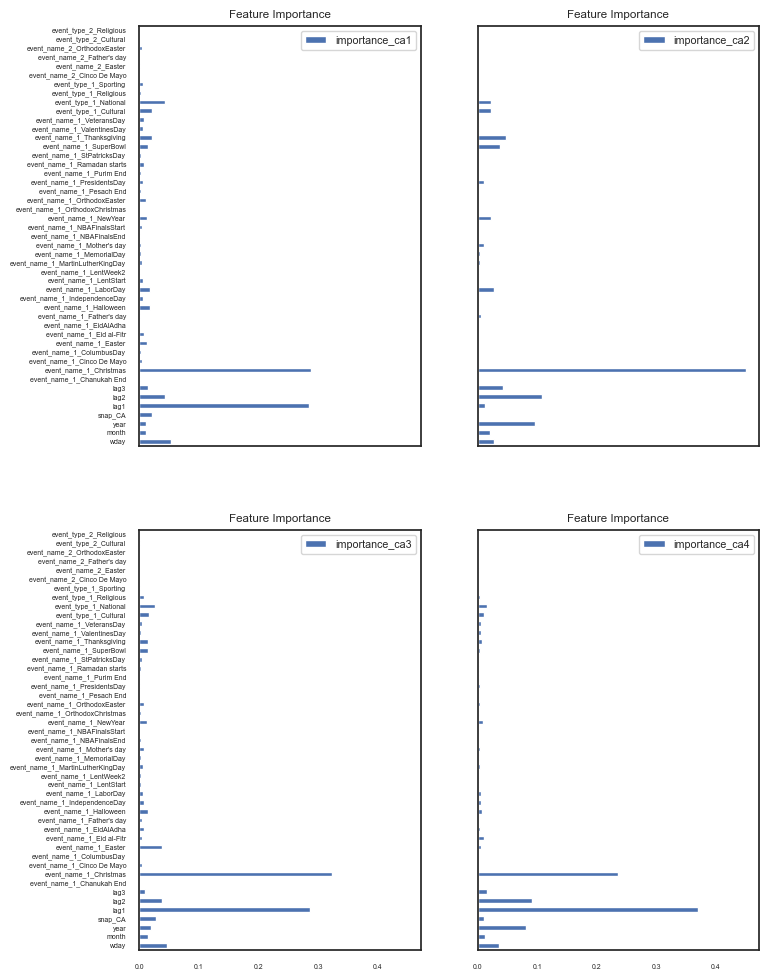

In [220]:
# sns.set(style='white', font_scale=.7)
# sns.set_style("whitegrid",{"axes.edgecolor": "black"})
fig, axes = plt.subplots(figsize=(8,12), nrows=2, ncols=2, sharex=True)
k = 0
for i in range(2):
    for j in range(2):      
        k += 1
        imp_plotting_df[[f'importance_ca{k}']].plot(kind='barh', ax= axes[i,j], title='Feature Importance',
                                                              fontsize=5, sharex=True, sharey=True)

Text(0.5, 0.98, 'True Values vs Prediction for California Stores')

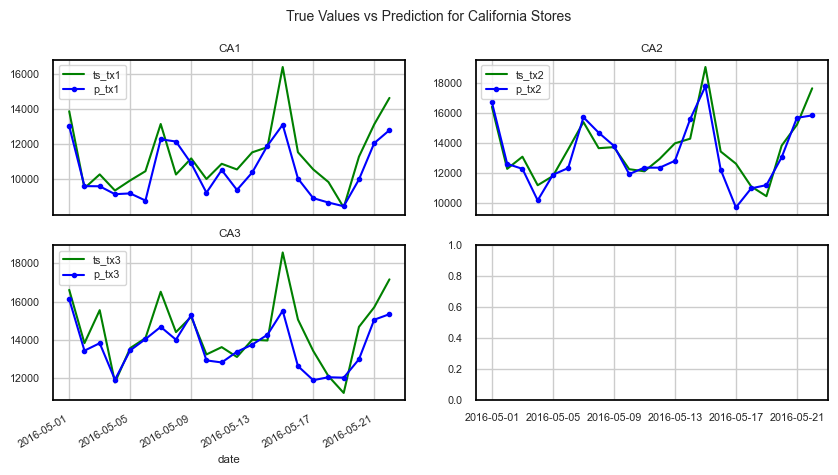

In [255]:
sns.set(style='white', font_scale=.7)
sns.set_style("whitegrid",{"axes.edgecolor": "black"})
fig, axes = plt.subplots(figsize=(10,5), nrows=2, ncols=2, sharex=True)
k = 0
for i in range(2):
    if i==0:
        for j in range(2):      
            k += 1
            tx_pred_plotting_df[[f'ts_tx{k}']].\
            loc[tx_pred_plotting_df.index >= '2016-05-01'].plot(ax=axes[i,j], grid=True, label=f'Test Set TX{k}', 
                                                                title=f'CA{k}', legend=True, x_compat=True, color='green')
            tx_pred_plotting_df[[f'p_tx{k}']].\
            loc[tx_pred_plotting_df.index >= '2016-05-01'].plot(ax=axes[i,j], grid=True, style='.-', color='blue',
                                                                label=f'Pred Set TX{k}', legend=True, x_compat=True)
    else:
        k += 1
        tx_pred_plotting_df[[f'ts_tx{k}']].\
        loc[tx_pred_plotting_df.index >= '2016-05-01'].plot(ax=axes[i,i-1], grid=True, label=f'Test Set TX{k}', 
                                                            title=f'CA{k}', legend=True, x_compat=True, color='green')
        tx_pred_plotting_df[[f'p_tx{k}']].\
        loc[tx_pred_plotting_df.index >= '2016-05-01'].plot(ax=axes[i,i-1], grid=True, style='.-', color='blue', 
                                                            label=f'Pred Set TX{k}', legend=True, x_compat=True)
fig.suptitle("True Values vs Prediction for Texas Stores")


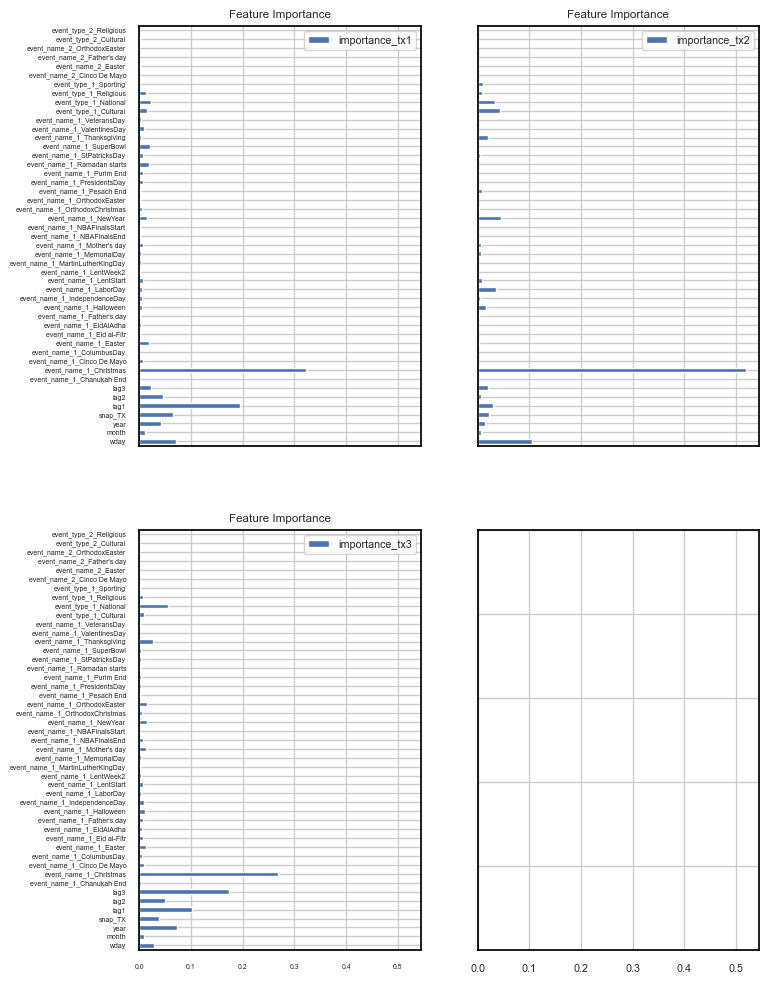

In [266]:
fig, axes = plt.subplots(figsize=(8,12), nrows=2, ncols=2, sharex=True)
k = 0
for i in range(2):
    for j in range(2):      
        k += 1
        tx_imp_plotting_df[[f'importance_tx{k}']].plot(kind='barh', ax= axes[i,j], title='Feature Importance',
                                                              fontsize=5, sharex=True, sharey=True)
        if i==1 and j==0:
            break

In [260]:
# fitting model for Texas
wi_pred_plotting_df = pd.DataFrame(index= wi1_df.index)
wi_imp_plotting_df = pd.DataFrame()
wi1_score, wi1_reg, wi_pred_plotting_df, wi_imp_plotting_df = fit_model(wi1_X_train, wi1_y_train, wi1_X_test, wi1_y_test, 
                                                                        wi1_test_df, wi_pred_plotting_df, 'wi1', 
                                                                        wi_imp_plotting_df, n_est=1000, early_stop=100, 
                                                                        learn_rate=.9, verbose=100)
wi2_score, wi2_reg, wi_pred_plotting_df, wi_imp_plotting_df = fit_model(wi2_X_train, wi2_y_train, wi2_X_test, wi2_y_test, 
                                                                        wi2_test_df, wi_pred_plotting_df, 'wi2', 
                                                                        wi_imp_plotting_df, n_est=1000, early_stop=100, 
                                                                        learn_rate=.6, verbose=100)
wi3_score, wi3_reg, wi_pred_plotting_df, wi_imp_plotting_df = fit_model(wi3_X_train, wi3_y_train, wi3_X_test, wi3_y_test, 
                                                                        wi3_test_df, wi_pred_plotting_df, 'wi3', 
                                                                        wi_imp_plotting_df, n_est=1000, early_stop=100, 
                                                                        learn_rate=.3, verbose=100)

[0]	validation_0-rmse:1491.86254	validation_1-rmse:2469.03735
[100]	validation_0-rmse:156.89228	validation_1-rmse:1566.07038
[105]	validation_0-rmse:152.28277	validation_1-rmse:1565.51892
[0]	validation_0-rmse:4212.34843	validation_1-rmse:8241.64854
[100]	validation_0-rmse:210.40390	validation_1-rmse:1517.67047
[125]	validation_0-rmse:185.59166	validation_1-rmse:1517.77530
[0]	validation_0-rmse:6458.03634	validation_1-rmse:9213.44616
[100]	validation_0-rmse:400.68878	validation_1-rmse:1362.80495
[160]	validation_0-rmse:347.78253	validation_1-rmse:1362.52897


Text(0.5, 0.98, 'True Values vs Prediction for Wisconsin Stores')

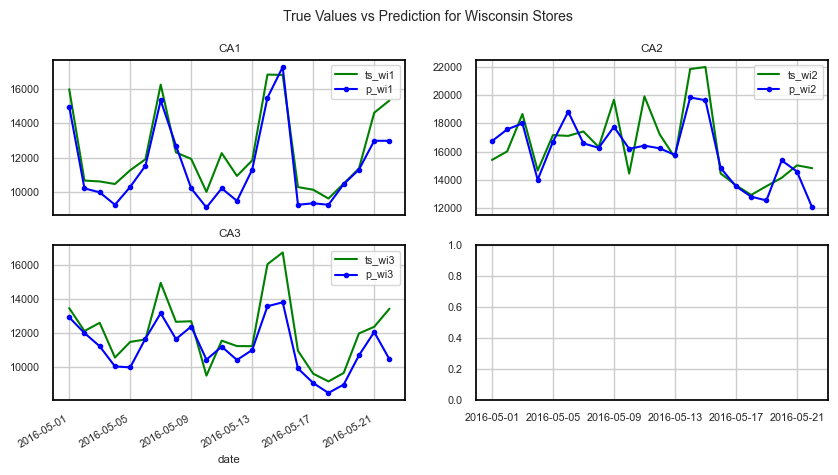

In [263]:
sns.set(style='white', font_scale=.7)
sns.set_style("whitegrid",{"axes.edgecolor": "black"})
fig, axes = plt.subplots(figsize=(10,5), nrows=2, ncols=2, sharex=True)
k = 0
for i in range(2):
    if i==0:
        for j in range(2):      
            k += 1
            wi_pred_plotting_df[[f'ts_wi{k}']].\
            loc[wi_pred_plotting_df.index >= '2016-05-01'].plot(ax=axes[i,j], grid=True, label=f'Test Set WI{k}', 
                                                                title=f'CA{k}', legend=True, x_compat=True, color='green')
            wi_pred_plotting_df[[f'p_wi{k}']].\
            loc[wi_pred_plotting_df.index >= '2016-05-01'].plot(ax=axes[i,j], grid=True, style='.-', color='blue',
                                                                label=f'Pred Set TX{k}', legend=True, x_compat=True)
    else:
        k += 1
        wi_pred_plotting_df[[f'ts_wi{k}']].\
        loc[wi_pred_plotting_df.index >= '2016-05-01'].plot(ax=axes[i,i-1], grid=True, label=f'Test Set WI{k}', 
                                                            title=f'CA{k}', legend=True, x_compat=True, color='green')
        wi_pred_plotting_df[[f'p_wi{k}']].\
        loc[wi_pred_plotting_df.index >= '2016-05-01'].plot(ax=axes[i,i-1], grid=True, style='.-', color='blue', 
                                                            label=f'Pred Set WI{k}', legend=True, x_compat=True)
fig.suptitle("True Values vs Prediction for Wisconsin Stores")

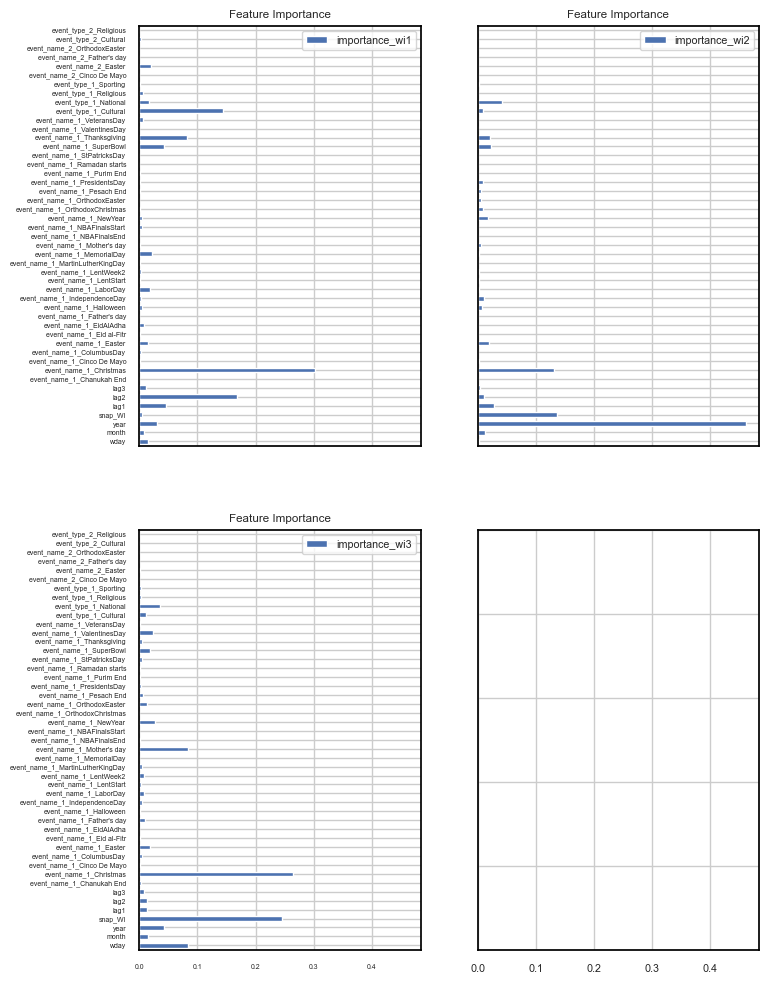

In [267]:
fig, axes = plt.subplots(figsize=(8,12), nrows=2, ncols=2, sharex=True)
k = 0
for i in range(2):
    for j in range(2):      
        k += 1
        wi_imp_plotting_df[[f'importance_wi{k}']].plot(kind='barh', ax= axes[i,j], title='Feature Importance',
                                                              fontsize=5, sharex=True, sharey=True)
        if i==1 and j==0:
            break